In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reformat Microbiome file to Match Metabolome

In [2]:
!qiime tools export \
    --input-path ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_feature_table.qza \
    --output-path ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_feature_table

Exported ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_feature_table.qza as BIOMV210DirFmt to directory ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_feature_table


In [3]:
!biom convert -i ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_feature_table/feature-table.biom -o ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_feature_table.tsv --to-tsv

In [10]:
microbiome = pd.read_csv('../data/Microbiome/pooling_filtered/sacrifice/sacrifice_feature_table.tsv', 
                         sep='\t', skiprows=1, index_col=0)
microbiome.head()
#sacrifice only, not longitudinal

14748.MOUSE103.CAGE68.MSPF3XTG.S7  \
#OTU ID                                         
G000005825                                1.0   
G000006605                                0.0   
G000006745                                0.0   
G000006785                                6.0   
G000006845                                0.0   

            14748.MOUSE34.CAGE16.FSPFB6.S15  14748.MOUSE10.CAGE3.FSPF3XTG.S15  \
#OTU ID                                                                         
G000005825                              0.0                               0.0   
G000006605                              0.0                               0.0   
G000006745                              0.0                               0.0   
G000006785                              0.0                               0.0   
G000006845                              0.0                               0.0   

            14748.MOUSE17.CAGE1.FSPF3XTG.S15  14748.MOUSE13.CAGE6.FSPFB6.S15  \
#OTU ID                                                                        
G000005825                               1.0                             2.0   
G000006605                               0.0                             0.0   
G000006745                               0.0                             0.0   
G000006785                               0.0                             1.0   
G000006845                               0.0                             0.0   

            14748.MOUSE14.CAGE6.FSPFB6.S15  14748.MOUSE9.CAGE3.FSPF3XTG.S15  \
#OTU ID                                                                       
G000005825                             0.0                              0.0   
G000006605                             0.0                              0.0   
G000006745                             0.0                              0.0   
G000006785                             0.0                              0.0   
G000006845                             0.0                              0.0   

            14748.MOUSE33.CAGE12.FSPF3XTG.S15  \
#OTU ID                                         
G000005825                                1.0   
G000006605                                0.0   
G000006745                                0.0   
G000006785                                1.0   
G000006845                                0.0   

            14748.MOUSE35.CAGE16.FSPFB6.S15  14748.MOUSE50.CAGE50.FSPF3XTG.S7  \
#OTU ID                                                                         
G000005825                              0.0                               1.0   
G000006605                              0.0                               0.0   
G000006745                              0.0                               0.0   
G000006785                              0.0                               1.0   
G000006845                              0.0                               0.0   

            ...  14748.MOUSE109.CAGE73.MSPFB6.S7  \
#OTU ID     ...                                    
G000005825  ...                              0.0   
G000006605  ...                              0.0   
G000006745  ...                              0.0   
G000006785  ...                              0.0   
G000006845  ...                              0.0   

            14748.MOUSE141.CAGE47.MSPFB6.S12  \
#OTU ID                                        
G000005825                               0.0   
G000006605                               0.0   
G000006745                               0.0   
G000006785                               1.0   
G000006845                               0.0   

            14748.MOUSE140.CAGE47.MSPFB6.S12  \
#OTU ID                                        
G000005825                               0.0   
G000006605                               0.0   
G000006745                               0.0   
G000006785                               0.0   
G000006845                               0.0   

            14748.MOUSE86.CAGE21.F

In [11]:
microbiome.shape

(5636, 75)

In [12]:
metadata = pd.read_csv('../data/Microbiome/14748_metadata_overpooling.txt', sep='\t',
                      usecols=['sample_name', 'genotype', 'sex', 'host_subject_id', 'host_age'])
metadata.tail()
#rename index from sample tube id to microbiome sample ids

sample_name genotype  host_age host_subject_id  \
475  14748.MOUSE87.CAGE21.FSPF3XTG.S12     3XTG      12.0         CAGE 21   
476  14748.MOUSE88.CAGE21.FSPF3XTG.S12     3XTG      12.0         CAGE 21   
477  14748.MOUSE89.CAGE22.FSPF3XTG.S12     3XTG      12.0         CAGE 22   
478    14748.MOUSE9.CAGE3.FSPF3XTG.S15     3XTG      15.0          CAGE 3   
479  14748.MOUSE90.CAGE22.FSPF3XTG.S12     3XTG      12.0         CAGE 22   

        sex  
475  female  
476  female  
477  female  
478  female  
479  female

In [13]:
metadata.shape

(480, 5)

In [14]:
#3xTG_SPF_3XTG_male_CAGE74_7.0
#3xTG_SPF_B6_female_CAGE53_7.0

metadata['host_age'] = metadata['host_age'].astype(float)
metadata['study_strain_sex_cage_tp'] = "3xTG_SPF_"+metadata['genotype'].astype(str)+"_"+metadata['sex'].astype(str)+"_"+metadata['host_subject_id'].astype(str)+"_"+metadata['host_age'].astype(str)
metadata['study_strain_sex_cage_tp'].replace(' ', '', regex=True, inplace=True)
metadata.tail()

sample_name genotype  host_age host_subject_id  \
475  14748.MOUSE87.CAGE21.FSPF3XTG.S12     3XTG      12.0         CAGE 21   
476  14748.MOUSE88.CAGE21.FSPF3XTG.S12     3XTG      12.0         CAGE 21   
477  14748.MOUSE89.CAGE22.FSPF3XTG.S12     3XTG      12.0         CAGE 22   
478    14748.MOUSE9.CAGE3.FSPF3XTG.S15     3XTG      15.0          CAGE 3   
479  14748.MOUSE90.CAGE22.FSPF3XTG.S12     3XTG      12.0         CAGE 22   

        sex          study_strain_sex_cage_tp  
475  female  3xTG_SPF_3XTG_female_CAGE21_12.0  
476  female  3xTG_SPF_3XTG_female_CAGE21_12.0  
477  female  3xTG_SPF_3XTG_female_CAGE22_12.0  
478  female   3xTG_SPF_3XTG_female_CAGE3_15.0  
479  female  3xTG_SPF_3XTG_female_CAGE22_12.0

In [15]:
rn_micro = pd.merge(metadata[['sample_name', 'study_strain_sex_cage_tp']], microbiome.T, 
                    left_on='sample_name', right_index=True)
rn_micro.head()

sample_name         study_strain_sex_cage_tp  \
404   14748.MOUSE10.CAGE3.FSPF3XTG.S15  3xTG_SPF_3XTG_female_CAGE3_15.0   
405  14748.MOUSE102.CAGE68.MSPF3XTG.S7    3xTG_SPF_3XTG_male_CAGE68_7.0   
406  14748.MOUSE103.CAGE68.MSPF3XTG.S7    3xTG_SPF_3XTG_male_CAGE68_7.0   
407  14748.MOUSE104.CAGE69.MSPF3XTG.S7    3xTG_SPF_3XTG_male_CAGE69_7.0   
408  14748.MOUSE105.CAGE69.MSPF3XTG.S7    3xTG_SPF_3XTG_male_CAGE69_7.0   

     G000005825  G000006605  G000006745  G000006785  G000006845  G000006865  \
404         0.0         0.0         0.0         0.0         0.0         0.0   
405         3.0         0.0         0.0         6.0         0.0         1.0   
406         1.0         0.0         0.0         6.0         0.0         0.0   
407         0.0         0.0         0.0         1.0         0.0         0.0   
408         1.0         0.0         0.0        22.0         2.0         4.0   

     G000006925  G000007085  ...  G902799635  G902800075  G902800225  \
404        56.0         0.0  ...         1.0         0.0         0.0   
405       513.0         0.0  ...         0.0         0.0         0.0   
406        68.0         0.0  ...         3.0         0.0         0.0   
407        24.0         0.0  ...         1.0         0.0         0.0   
408        22.0         1.0  ...         1.0         0.0         0.0   

     G902800385  G902801355  G902801605  G902801795  G902801825  G902801975  \
404         5.0         0.0         0.0         0.0         0.0         0.0   
405         0.0         0.0         0.0         0.0         0.0         0.0   
406         0.0         0.0         0.0         0.0         0.0         0.0   
407         0.0         0.0         0.0         0.0         0.0         0.0   
408         0.0         0.0         0.0         0.0         0.0         0.0   

     G902810735  
404         0.0  
405         0.0  
406         0.0  
407         0.0  
408         0.0  

[5 rows x 5638 columns]

In [16]:
rn_micro.set_index('study_strain_sex_cage_tp', inplace=True)
rn_micro.head()

sample_name  \
study_strain_sex_cage_tp                                             
3xTG_SPF_3XTG_female_CAGE3_15.0   14748.MOUSE10.CAGE3.FSPF3XTG.S15   
3xTG_SPF_3XTG_male_CAGE68_7.0    14748.MOUSE102.CAGE68.MSPF3XTG.S7   
3xTG_SPF_3XTG_male_CAGE68_7.0    14748.MOUSE103.CAGE68.MSPF3XTG.S7   
3xTG_SPF_3XTG_male_CAGE69_7.0    14748.MOUSE104.CAGE69.MSPF3XTG.S7   
3xTG_SPF_3XTG_male_CAGE69_7.0    14748.MOUSE105.CAGE69.MSPF3XTG.S7   

                                 G000005825  G000006605  G000006745  \
study_strain_sex_cage_tp                                              
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           3.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           1.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           1.0         0.0         0.0   

                                 G000006785  G000006845  G000006865  \
study_strain_sex_cage_tp                                              
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           6.0         0.0         1.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           6.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           1.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0          22.0         2.0         4.0   

                                 G000006925  G000007085  G000007105  ...  \
study_strain_sex_cage_tp                                             ...   
3xTG_SPF_3XTG_female_CAGE3_15.0        56.0         0.0         0.0  ...   
3xTG_SPF_3XTG_male_CAGE68_7.0         513.0         0.0         0.0  ...   
3xTG_SPF_3XTG_male_CAGE68_7.0          68.0         0.0         0.0  ...   
3xTG_SPF_3XTG_male_CAGE69_7.0          24.0         0.0         0.0  ...   
3xTG_SPF_3XTG_male_CAGE69_7.0          22.0         1.0         0.0  ...   

                                 G902799635  G902800075  G902800225  \
study_strain_sex_cage_tp                                              
3xTG_SPF_3XTG_female_CAGE3_15.0         1.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           3.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           1.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           1.0         0.0         0.0   

                                 G902800385  G902801355  G902801605  \
study_strain_sex_cage_tp                                              
3xTG_SPF_3XTG_female_CAGE3_15.0         5.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   

                                 G902801795  G902801825  G902801975  \
study_strain_sex_cage_tp                                              
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   

                                 G902810735  
study_strain_sex_cage_tp                     
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0  
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0  
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0  
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0  
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0  

[5 rows x 5637 columns]

In [17]:
rn_micro2 = rn_micro.drop(columns=['sample_name'])
rn_micro2.index.name='#OTU ID'
rn_micro2.head()

G000005825  G000006605  G000006745  \
#OTU ID                                                               
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           3.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           1.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           1.0         0.0         0.0   

                                 G000006785  G000006845  G000006865  \
#OTU ID                                                               
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           6.0         0.0         1.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           6.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           1.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0          22.0         2.0         4.0   

                                 G000006925  G000007085  G000007105  \
#OTU ID                                                               
3xTG_SPF_3XTG_female_CAGE3_15.0        56.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0         513.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0          68.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0          24.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0          22.0         1.0         0.0   

                                 G000007145  ...  G902799635  G902800075  \
#OTU ID                                      ...                           
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0  ...         1.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0  ...         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0  ...         3.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0  ...         1.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0  ...         1.0         0.0   

                                 G902800225  G902800385  G902801355  \
#OTU ID                                                               
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         5.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   

                                 G902801605  G902801795  G902801825  \
#OTU ID                                                               
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0         0.0   

                                 G902801975  G902810735  
#OTU ID                                                  
3xTG_SPF_3XTG_female_CAGE3_15.0         0.0         0.0  
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0  
3xTG_SPF_3XTG_male_CAGE68_7.0           0.0         0.0  
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0  
3xTG_SPF_3XTG_male_CAGE69_7.0           0.0         0.0  

[5 rows x 5636 columns]

In [18]:
rn_micro3 = rn_micro2.T.copy()
rn_micro4 = rn_micro3.groupby(by=rn_micro3.columns, axis=1).mean()
rn_micro4.head()
#duplicate samples, mean

#OTU ID     3xTG_SPF_3XTG_female_CAGE12_15.0  3xTG_SPF_3XTG_female_CAGE1_15.0  \
G000005825                               0.5                              0.5   
G000006605                               0.0                              0.0   
G000006745                               0.0                              0.0   
G000006785                               0.5                              0.0   
G000006845                               0.0                              0.0   

#OTU ID     3xTG_SPF_3XTG_female_CAGE20_12.0  \
G000005825                          0.666667   
G000006605                          0.000000   
G000006745                          0.000000   
G000006785                          4.666667   
G000006845                          0.000000   

#OTU ID     3xTG_SPF_3XTG_female_CAGE21_12.0  \
G000005825                               2.0   
G000006605                               0.0   
G000006745                               0.0   
G000006785                               2.0   
G000006845                               0.0   

#OTU ID     3xTG_SPF_3XTG_female_CAGE22_12.0  3xTG_SPF_3XTG_female_CAGE2_15.0  \
G000005825                               0.0                              0.0   
G000006605                               0.0                              0.0   
G000006745                               0.0                              0.0   
G000006785                               1.0                              0.0   
G000006845                               0.0                              0.0   

#OTU ID     3xTG_SPF_3XTG_female_CAGE3_15.0  3xTG_SPF_3XTG_female_CAGE50_7.0  \
G000005825                              0.0                              1.2   
G000006605                              0.0                              0.0   
G000006745                              0.0                              0.0   
G000006785                              0.0                              1.6   
G000006845                              0.0                              0.0   

#OTU ID     3xTG_SPF_3XTG_female_CAGE53_7.0  3xTG_SPF_3XTG_female_CAGE62_7.0  \
G000005825                         0.666667                              0.0   
G000006605                         5.333333                              0.0   
G000006745                         0.000000                              0.0   
G000006785                         3.333333                              0.0   
G000006845                         0.000000                              0.0   

#OTU ID     ...  3xTG_SPF_B6_female_CAGE27_12.0  \
G000005825  ...                             0.0   
G000006605  ...                             0.0   
G000006745  ...                             0.0   
G000006785  ...                             1.8   
G000006845  ...                             0.2   

#OTU ID     3xTG_SPF_B6_female_CAGE54_7.0  3xTG_SPF_B6_female_CAGE66_12.0  \
G000005825                       0.000000                        0.333333   
G000006605                       0.000000                        0.000000   
G000006745                       0.333333                        0.000000   
G000006785                       0.666667                        0.333333   
G000006845                       0.000000                        0.000000   

#OTU ID     3xTG_SPF_B6_female_CAGE6_15.0  3xTG_SPF_B6_female_CAGE7_15.0  \
G000005825                           0.50                            0.0   
G000006605                           0.00                            0.0   
G000006745                           0.00                            0.0   
G000006785                           0.25                            0.0   
G000006845                           0.00                            0.0   

#OTU ID     3xTG_SPF_B6_male_CAGE45_12.0  3xTG_SPF_B6_male_CAGE46_12.0  \
G000005825                      0.000000                      0.000000   
G000006605                      0.000000                      4.333333   
G000006745                      0.000

In [19]:
rn_micro4.to_csv('../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.tsv', sep='\t')

In [20]:
!biom convert -i ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.tsv -o ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.biom --table-type="OTU table" --to-hdf5

In [21]:
!qiime tools import \
    --input-path ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.biom \
    --input-format BIOMV210Format \
    --type 'FeatureTable[Frequency]' \
    --output-path ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.qza

Imported ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.biom as BIOMV210Format to ../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.qza


# All 3XTG Metab Tissues vs Microbiome JointRPCA

In [8]:
import qiime2 as q2
from qiime2.plugins.emperor.actions import biplot
from qiime2.plugins.gemelli.actions import (joint_rpca, filter_ordination, feature_correlation_table)
from qiime2.plugins.longitudinal.actions import volatility
from qiime2.plugins.diversity.visualizers import beta_group_significance

In [9]:
# import tables
microbe = q2.Artifact.load('../data/Microbiome/pooling_filtered/sacrifice/sacrifice_3XTG_reformat.qza')
brain = q2.Artifact.load('../../Multiomics/data/Metabolome/04062024/rawdata_brain_reformat.qza')
fecal = q2.Artifact.load('../../Multiomics/data/Metabolome/04062024/rawdata_fecal_3xtg_reformat.qza')
cecal = q2.Artifact.load('../../Multiomics/data/Metabolome/04062024/rawdata_cecal_reformat.qza')
liver = q2.Artifact.load('../../Multiomics/data/Metabolome/04062024/rawdata_liver_reformat.qza')
serum = q2.Artifact.load('../../Multiomics/data/Metabolome/04062024/rawdata_serum_reformat.qza')
# import metadata
metadata = q2.Metadata.load('../data/Metabolome/all_jointRPCA/rpca_metadata.tsv')

### Brain

In [78]:
# run joint RPCA
jrpca_results = joint_rpca([brain, microbe],
                           sample_metadata=metadata,
                           min_feature_frequency=5,
                           max_iterations=3)
jrpca_results.biplot.save('../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination.qza')
jrpca_results.distance_matrix.save('../data/Metabolome/paired_jointRPCA/brain-microbe_distance-matrix.qza')
jrpca_results.cross_validation_error.save('../data/Metabolome/paired_jointRPCA/brain-microbe_cross-validation-error.qza')

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:708: RuntimeWarning: Removing 71 sample(s) that do not overlap in tables.
  warnings.warn('Removing %i sample(s) that do not overlap in tables.'
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:902: RuntimeWarning: Removing 0 features(s) in table(s) but not the ordination.
  warnings.warn('Removing %i features(s) in table(s)'


'../data/Metabolome/paired_jointRPCA/brain-microbe_cross-validation-error.qza'

In [79]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Metabolome/paired_jointRPCA/brain-microbe_cross-validation-error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Metabolome/paired_jointRPCA/brain-microbe_volatility-plot.qzv
#looks good

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/brain-microbe_volatility-plot.qzv


In [80]:
!qiime emperor biplot \
    --i-biplot ../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination.qza \
    --m-sample-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --p-number-of-features 12 \
    --o-visualization ../data/Metabolome/paired_jointRPCA/brain-microbe_emperor-biplot.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/brain-microbe_emperor-biplot.qzv


In [81]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/brain-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'Strain'\
    --o-visualization ../data/Metabolome/paired_jointRPCA/brain-microbe_jointRPCA_bsig_strain.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/brain-microbe_jointRPCA_bsig_strain.qzv


In [82]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/brain-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'strain_sex'\
    --p-pairwise True \
    --o-visualization ../data/Metabolome/paired_jointRPCA/brain-microbe_jointRPCA_bsig_strain-sex.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/brain-microbe_jointRPCA_bsig_strain-sex.qzv


In [83]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination.qza \
    --o-correlation-table ../data/Metabolome/paired_jointRPCA/brain-microbe_correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Metabolome/paired_jointRPCA/brain-microbe_correlation_table.qza


In [84]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/brain-microbe_correlation_table.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/brain-microbe_correlation_table

Exported ../data/Metabolome/paired_jointRPCA/brain-microbe_correlation_table.qza as CorrelationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/brain-microbe_correlation_table


In [140]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination

Exported ../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination.qza as OrdinationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination


### Fecal

In [85]:
# run joint RPCA
jrpca_results = joint_rpca([fecal, microbe],
                           sample_metadata=metadata,
                           min_feature_frequency=5,
                           max_iterations=3)
jrpca_results.biplot.save('../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination.qza')
jrpca_results.distance_matrix.save('../data/Metabolome/paired_jointRPCA/fecal-microbe_distance-matrix.qza')
jrpca_results.cross_validation_error.save('../data/Metabolome/paired_jointRPCA/fecal-microbe_cross-validation-error.qza')

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:708: RuntimeWarning: Removing 3 sample(s) that do not overlap in tables.
  warnings.warn('Removing %i sample(s) that do not overlap in tables.'
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:902: RuntimeWarning: Removing 0 features(s) in table(s) but not the ordination.
  warnings.warn('Removing %i features(s) in table(s)'


'../data/Metabolome/paired_jointRPCA/fecal-microbe_cross-validation-error.qza'

In [86]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Metabolome/paired_jointRPCA/fecal-microbe_cross-validation-error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Metabolome/paired_jointRPCA/fecal-microbe_volatility-plot.qzv
#looks good

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/fecal-microbe_volatility-plot.qzv


In [87]:
!qiime emperor biplot \
    --i-biplot ../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination.qza \
    --m-sample-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --p-number-of-features 12 \
    --o-visualization ../data/Metabolome/paired_jointRPCA/fecal-microbe_emperor-biplot.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/fecal-microbe_emperor-biplot.qzv


In [88]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/fecal-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'Strain'\
    --o-visualization ../data/Metabolome/paired_jointRPCA/fecal-microbe_jointRPCA_bsig_strain.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/fecal-microbe_jointRPCA_bsig_strain.qzv


In [89]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/fecal-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'strain_sex'\
    --p-pairwise True \
    --o-visualization ../data/Metabolome/paired_jointRPCA/fecal-microbe_jointRPCA_bsig_strain-sex.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/fecal-microbe_jointRPCA_bsig_strain-sex.qzv


In [90]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination.qza \
    --o-correlation-table ../data/Metabolome/paired_jointRPCA/fecal-microbe_correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Metabolome/paired_jointRPCA/fecal-microbe_correlation_table.qza


In [91]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/fecal-microbe_correlation_table.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/fecal-microbe_correlation_table

Exported ../data/Metabolome/paired_jointRPCA/fecal-microbe_correlation_table.qza as CorrelationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/fecal-microbe_correlation_table


In [141]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination

Exported ../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination.qza as OrdinationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination


### Cecum

In [92]:
# run joint RPCA
jrpca_results = joint_rpca([cecal, microbe],
                           sample_metadata=metadata,
                           min_feature_frequency=5,
                           max_iterations=3)
jrpca_results.biplot.save('../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination.qza')
jrpca_results.distance_matrix.save('../data/Metabolome/paired_jointRPCA/cecal-microbe_distance-matrix.qza')
jrpca_results.cross_validation_error.save('../data/Metabolome/paired_jointRPCA/cecal-microbe_cross-validation-error.qza')

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:708: RuntimeWarning: Removing 69 sample(s) that do not overlap in tables.
  warnings.warn('Removing %i sample(s) that do not overlap in tables.'
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:902: RuntimeWarning: Removing 0 features(s) in table(s) but not the ordination.
  warnings.warn('Removing %i features(s) in table(s)'


'../data/Metabolome/paired_jointRPCA/cecal-microbe_cross-validation-error.qza'

In [93]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Metabolome/paired_jointRPCA/cecal-microbe_cross-validation-error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Metabolome/paired_jointRPCA/cecal-microbe_volatility-plot.qzv
#looks good

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/cecal-microbe_volatility-plot.qzv


In [94]:
!qiime emperor biplot \
    --i-biplot ../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination.qza \
    --m-sample-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --p-number-of-features 12 \
    --o-visualization ../data/Metabolome/paired_jointRPCA/cecal-microbe_emperor-biplot.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/cecal-microbe_emperor-biplot.qzv


In [95]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/cecal-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'Strain'\
    --o-visualization ../data/Metabolome/paired_jointRPCA/cecal-microbe_jointRPCA_bsig_strain.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/cecal-microbe_jointRPCA_bsig_strain.qzv


In [96]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/cecal-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'strain_sex'\
    --p-pairwise True \
    --o-visualization ../data/Metabolome/paired_jointRPCA/cecal-microbe_jointRPCA_bsig_strain-sex.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/cecal-microbe_jointRPCA_bsig_strain-sex.qzv


In [97]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination.qza \
    --o-correlation-table ../data/Metabolome/paired_jointRPCA/cecal-microbe_correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Metabolome/paired_jointRPCA/cecal-microbe_correlation_table.qza


In [98]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/cecal-microbe_correlation_table.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/cecal-microbe_correlation_table

Exported ../data/Metabolome/paired_jointRPCA/cecal-microbe_correlation_table.qza as CorrelationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/cecal-microbe_correlation_table


In [142]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination

Exported ../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination.qza as OrdinationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination


### Liver

In [99]:
# run joint RPCA
jrpca_results = joint_rpca([liver, microbe],
                           sample_metadata=metadata,
                           min_feature_frequency=5,
                           max_iterations=3)
jrpca_results.biplot.save('../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination.qza')
jrpca_results.distance_matrix.save('../data/Metabolome/paired_jointRPCA/liver-microbe_distance-matrix.qza')
jrpca_results.cross_validation_error.save('../data/Metabolome/paired_jointRPCA/liver-microbe_cross-validation-error.qza')

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:708: RuntimeWarning: Removing 68 sample(s) that do not overlap in tables.
  warnings.warn('Removing %i sample(s) that do not overlap in tables.'
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:902: RuntimeWarning: Removing 0 features(s) in table(s) but not the ordination.
  warnings.warn('Removing %i features(s) in table(s)'


'../data/Metabolome/paired_jointRPCA/liver-microbe_cross-validation-error.qza'

In [100]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Metabolome/paired_jointRPCA/liver-microbe_cross-validation-error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Metabolome/paired_jointRPCA/liver-microbe_volatility-plot.qzv
#looks good

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/liver-microbe_volatility-plot.qzv


In [101]:
!qiime emperor biplot \
    --i-biplot ../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination.qza \
    --m-sample-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --p-number-of-features 12 \
    --o-visualization ../data/Metabolome/paired_jointRPCA/liver-microbe_emperor-biplot.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/liver-microbe_emperor-biplot.qzv


In [102]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/liver-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'Strain'\
    --o-visualization ../data/Metabolome/paired_jointRPCA/liver-microbe_jointRPCA_bsig_strain.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/liver-microbe_jointRPCA_bsig_strain.qzv


In [103]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/liver-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'strain_sex'\
    --p-pairwise True \
    --o-visualization ../data/Metabolome/paired_jointRPCA/liver-microbe_jointRPCA_bsig_strain-sex.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/liver-microbe_jointRPCA_bsig_strain-sex.qzv


In [104]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination.qza \
    --o-correlation-table ../data/Metabolome/paired_jointRPCA/liver-microbe_correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Metabolome/paired_jointRPCA/liver-microbe_correlation_table.qza


In [105]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/liver-microbe_correlation_table.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/liver-microbe_correlation_table

Exported ../data/Metabolome/paired_jointRPCA/liver-microbe_correlation_table.qza as CorrelationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/liver-microbe_correlation_table


In [143]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination

Exported ../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination.qza as OrdinationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination


### Serum

In [106]:
# run joint RPCA
jrpca_results = joint_rpca([serum, microbe],
                           sample_metadata=metadata,
                           min_feature_frequency=5,
                           max_iterations=3)
jrpca_results.biplot.save('../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination.qza')
jrpca_results.distance_matrix.save('../data/Metabolome/paired_jointRPCA/serum-microbe_distance-matrix.qza')
jrpca_results.cross_validation_error.save('../data/Metabolome/paired_jointRPCA/serum-microbe_cross-validation-error.qza')

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:708: RuntimeWarning: Removing 76 sample(s) that do not overlap in tables.
  warnings.warn('Removing %i sample(s) that do not overlap in tables.'
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/preprocessing.py:425: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))
/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/gemelli/rpca.py:902: RuntimeWarning: Removing 0 features(s) in table(s) but not the ordination.
  warnings.warn('Removing %i features(s) in table(s)'


'../data/Metabolome/paired_jointRPCA/serum-microbe_cross-validation-error.qza'

In [107]:
!qiime longitudinal volatility \
    --m-metadata-file ../data/Metabolome/paired_jointRPCA/serum-microbe_cross-validation-error.qza \
    --p-state-column 'iteration' \
    --o-visualization ../data/Metabolome/paired_jointRPCA/serum-microbe_volatility-plot.qzv
#looks good

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/serum-microbe_volatility-plot.qzv


In [108]:
!qiime emperor biplot \
    --i-biplot ../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination.qza \
    --m-sample-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --p-number-of-features 12 \
    --o-visualization ../data/Metabolome/paired_jointRPCA/serum-microbe_emperor-biplot.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/serum-microbe_emperor-biplot.qzv


In [109]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/serum-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'Strain'\
    --o-visualization ../data/Metabolome/paired_jointRPCA/serum-microbe_jointRPCA_bsig_strain.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/serum-microbe_jointRPCA_bsig_strain.qzv


In [110]:
!qiime diversity beta-group-significance \
    --i-distance-matrix ../data/Metabolome/paired_jointRPCA/serum-microbe_distance-matrix.qza \
    --m-metadata-file ../data/Metabolome/all_jointRPCA/rpca_metadata.tsv \
    --m-metadata-column 'strain_sex'\
    --p-pairwise True \
    --o-visualization ../data/Metabolome/paired_jointRPCA/serum-microbe_jointRPCA_bsig_strain-sex.qzv

Saved Visualization to: ../data/Metabolome/paired_jointRPCA/serum-microbe_jointRPCA_bsig_strain-sex.qzv


In [111]:
!qiime gemelli feature-correlation-table \
    --i-ordination ../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination.qza \
    --o-correlation-table ../data/Metabolome/paired_jointRPCA/serum-microbe_correlation_table.qza

Saved FeatureData[OrdinationCorrelation] to: ../data/Metabolome/paired_jointRPCA/serum-microbe_correlation_table.qza


In [112]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/serum-microbe_correlation_table.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/serum-microbe_correlation_table

Exported ../data/Metabolome/paired_jointRPCA/serum-microbe_correlation_table.qza as CorrelationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/serum-microbe_correlation_table


In [144]:
!qiime tools export \
    --input-path ../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination.qza \
    --output-path ../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination

Exported ../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination.qza as OrdinationDirectoryFormat to directory ../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination


# Plotting/Graphs

In [113]:
brain_corr_table = pd.read_csv('../data/Metabolome/paired_jointRPCA/brain-microbe_correlation_table/Correlation.tsv',
                              sep='\t', index_col=0,)
fecal_corr_table = pd.read_csv('../data/Metabolome/paired_jointRPCA/fecal-microbe_correlation_table/Correlation.tsv',
                              sep='\t', index_col=0,)
cecal_corr_table = pd.read_csv('../data/Metabolome/paired_jointRPCA/cecal-microbe_correlation_table/Correlation.tsv',
                              sep='\t', index_col=0,)
liver_corr_table = pd.read_csv('../data/Metabolome/paired_jointRPCA/liver-microbe_correlation_table/Correlation.tsv',
                              sep='\t', index_col=0,)
serum_corr_table = pd.read_csv('../data/Metabolome/paired_jointRPCA/serum-microbe_correlation_table/Correlation.tsv',
                              sep='\t', index_col=0,)

In [114]:
serum_corr_table.head()

serum_1099  serum_131  serum_645  serum_336  serum_278  serum_655  \
featureid                                                                       
serum_1099    1.000000  -0.999674  -0.998626  -0.999838  -0.998528  -0.999855   
serum_131    -0.999674   1.000000   0.999349   0.999942   0.997914   0.999922   
serum_645    -0.998626   0.999349   1.000000   0.999362   0.994966   0.998877   
serum_336    -0.999838   0.999942   0.999362   1.000000   0.997840   0.999906   
serum_278    -0.998528   0.997914   0.994966   0.997840   1.000000   0.998595   

            serum_4584  serum_3393  serum_123  serum_3015  ...  G902798845  \
featureid                                                  ...               
serum_1099   -0.723271   -0.999720  -0.999665   -0.999358  ...    0.999891   
serum_131     0.727948    0.999712   0.999999    0.999627  ...   -0.999937   
serum_645     0.751768    0.998203   0.999386    0.999828  ...   -0.999035   
serum_336     0.730592    0.999641   0.999945    0.999761  ...   -0.999959   
serum_278     0.684851    0.999175   0.997848    0.996181  ...   -0.998385   

            G902799415  G902799635  G902800075  G902800225  G902800385  \
featureid                                                                
serum_1099    0.998913    0.998690    0.999423    0.996149    0.998933   
serum_131    -0.998094   -0.997067   -0.999786   -0.997596   -0.999504   
serum_645    -0.998128   -0.995431   -0.999830   -0.999374   -0.999979   
serum_336    -0.998695   -0.997711   -0.999846   -0.997495   -0.999553   
serum_278    -0.995412   -0.997471   -0.996552   -0.991054   -0.995474   

            G902801355  G902801795  G902801825  G902801975  
featureid                                                   
serum_1099    0.999787    0.998124    0.996773    0.996996  
serum_131    -0.999912   -0.999129   -0.997748   -0.998102  
serum_645    -0.999487   -0.999939   -0.999515   -0.999668  
serum_336    -0.999990   -0.999044   -0.997862   -0.998117  
serum_278    -0.997549   -0.994361   -0.991439   -0.992060  

[5 rows x 8386 columns]

In [115]:
serum_corr_table.shape

(8386, 8386)

In [116]:
def corr_table_filter(tbl):
    ctable = tbl.copy()
    ctable1 = ctable.filter(regex="G[0-9]*", axis=0)
    ctable2 = ctable1.filter(regex="^(?![G])", axis=1)
    return ctable2

In [117]:
brain_filt = corr_table_filter(brain_corr_table)
fecal_filt = corr_table_filter(fecal_corr_table)
cecal_filt = corr_table_filter(cecal_corr_table)
liver_filt = corr_table_filter(liver_corr_table)
serum_filt = corr_table_filter(serum_corr_table)

In [118]:
serum_filt.shape

(3976, 4410)

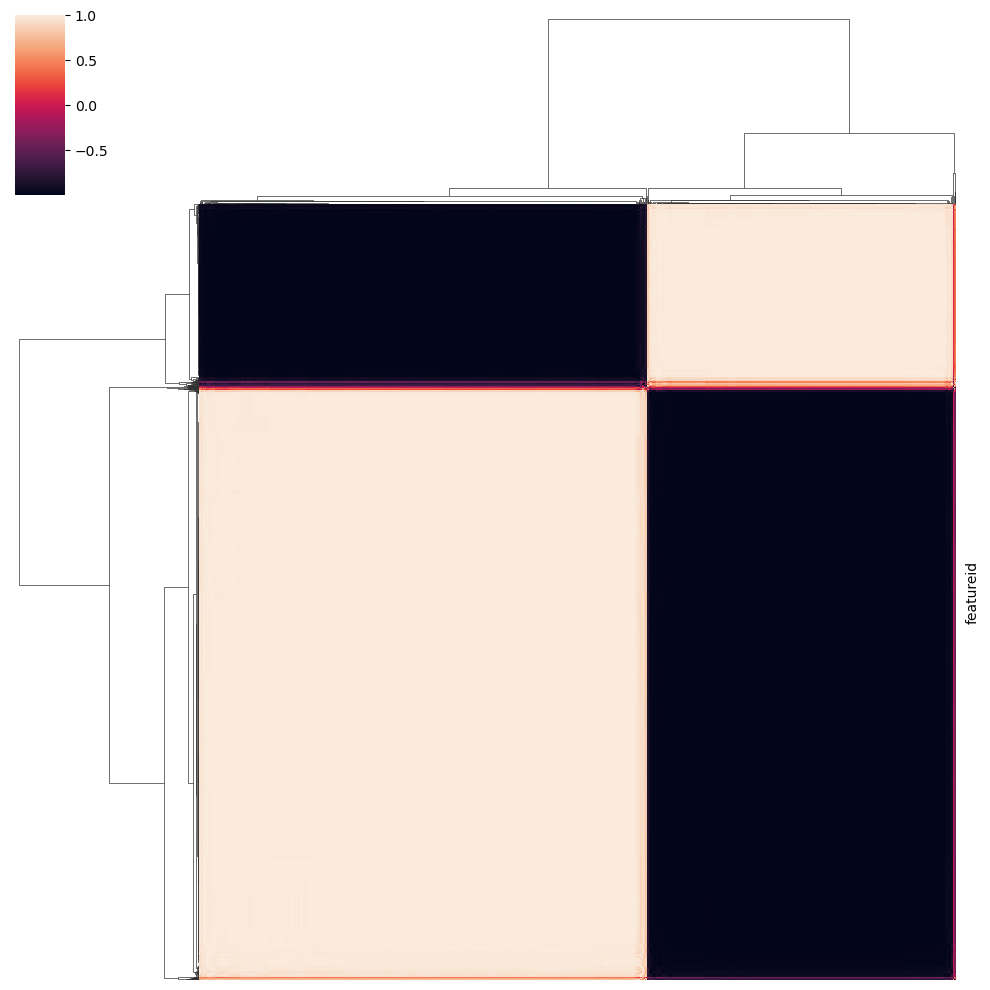

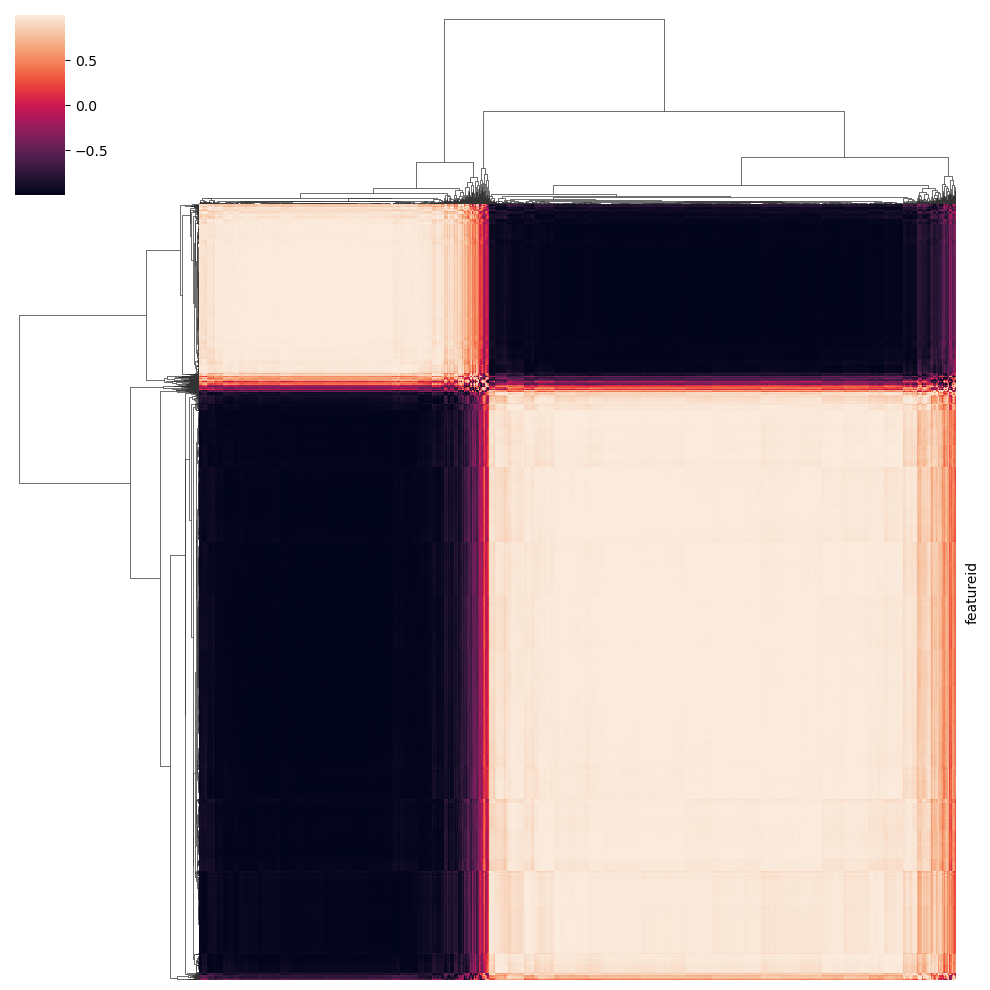

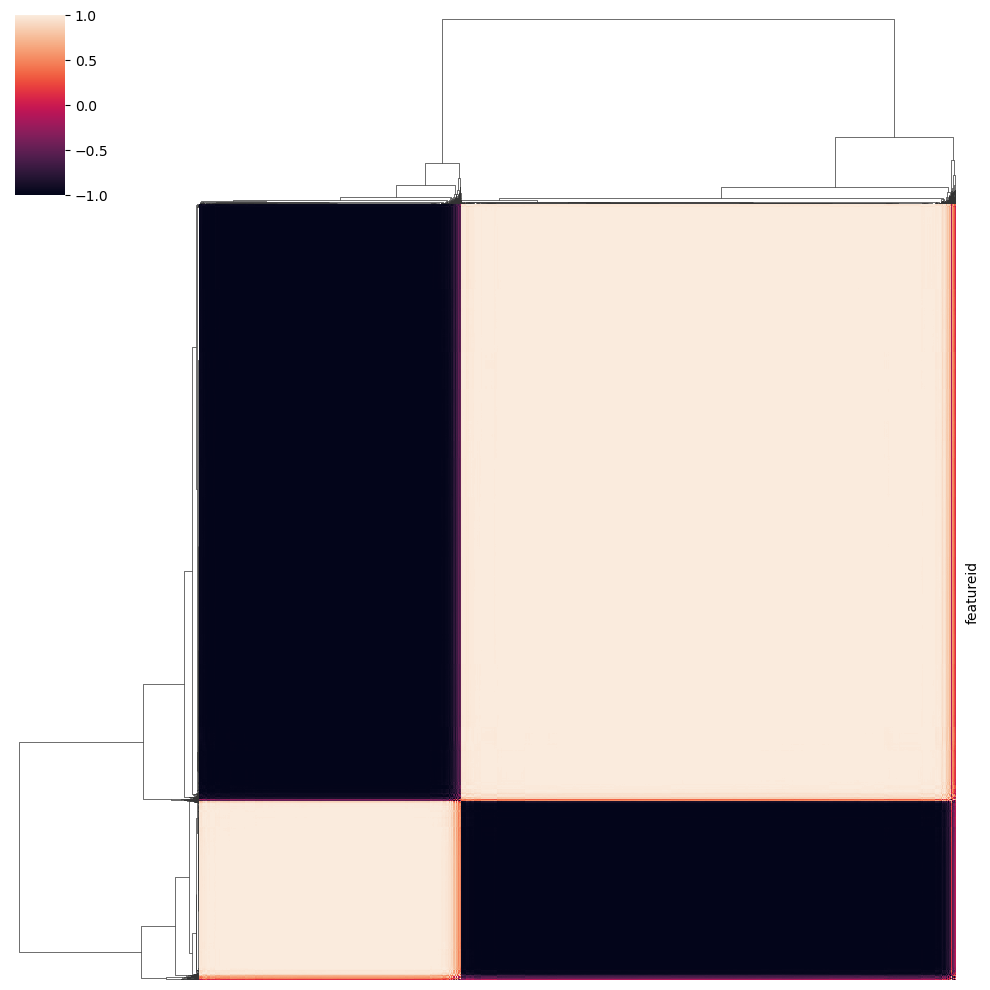

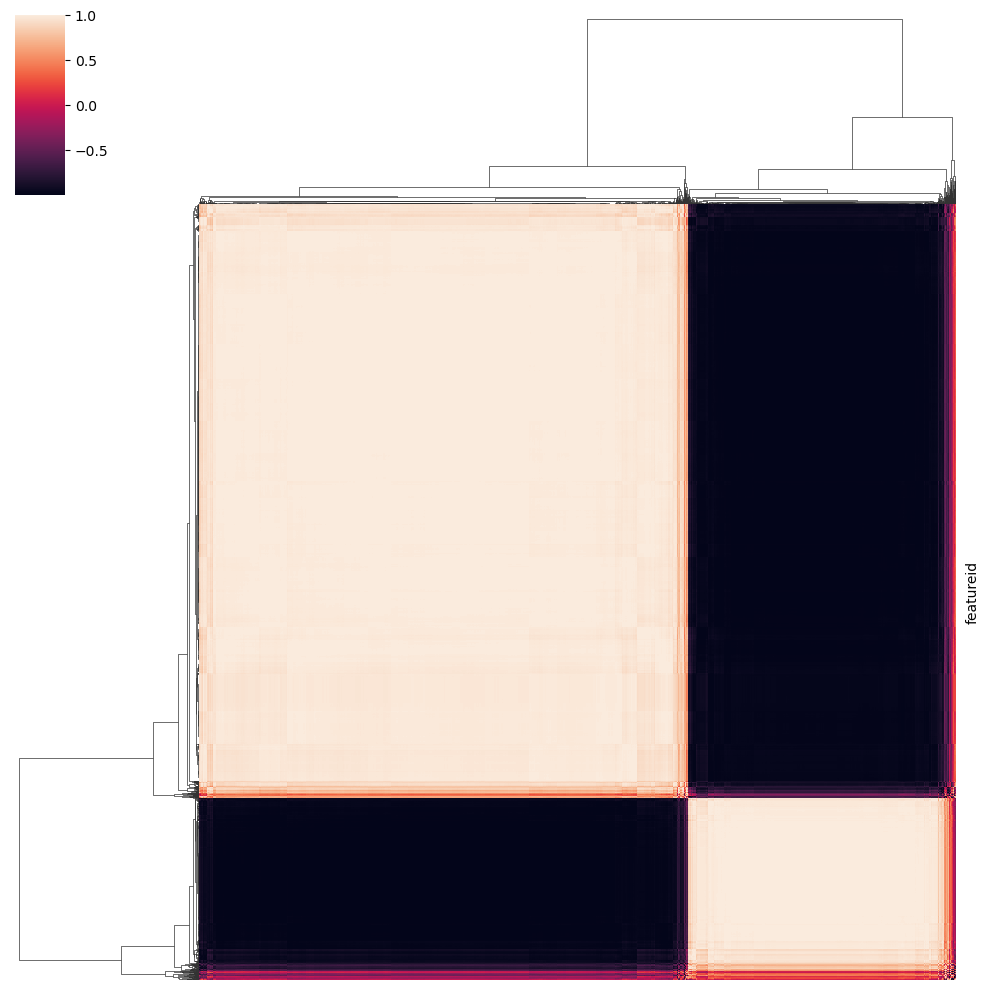

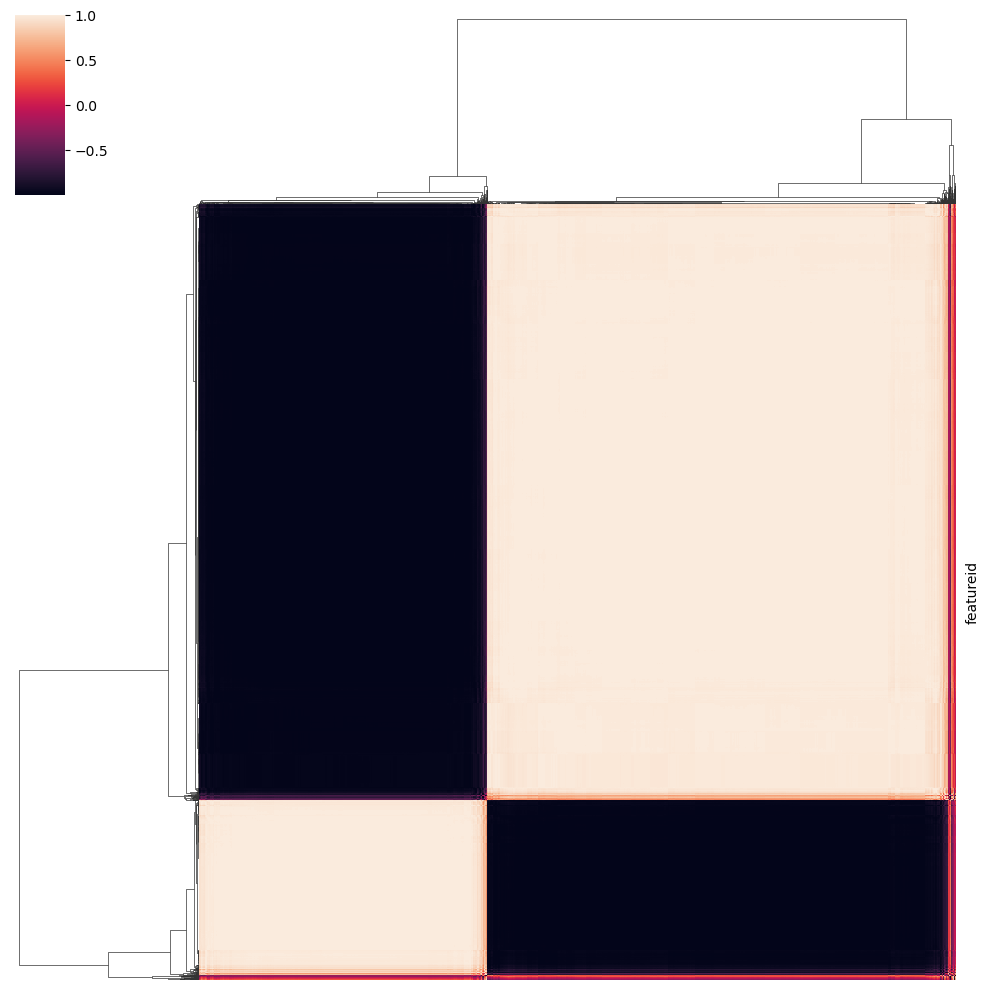

In [123]:
for table, name in [(brain_filt, 'brain'), (fecal_filt, 'fecal'), (cecal_filt, 'cecal'), 
                    (liver_filt, 'liver'), (serum_filt, 'serum')]:
    sns.clustermap(table, yticklabels=False, xticklabels=False)
    plt.savefig(f'../data/Metabolome/paired_jointRPCA/{name}-micro_allcorr.png', dpi=150, bbox_inches='tight')
    plt.show()

# Metabolites of Interest

In [55]:
topbot1_LR = pd.read_csv('../data/Microbiome/pooling_filtered/sacrifice/RPCA/3XTG_RPCA_topbot1perc_feat.tsv', sep='\t', index_col=0)
micro1 = list(topbot1_LR.index.values)
micro1

['G009767915',
 'G001953785',
 'G001434535',
 'G000436435',
 'G000686565',
 'G000154205',
 'G001940945',
 'G000980515',
 'G001917295',
 'G000723745',
 'G000020225',
 'G000436395']

In [56]:
b_metab_interest = pd.read_csv('../../Multiomics/data/Metabolome/04062024/brain_interest.csv')
f3_metab_interest = pd.read_csv('../../Multiomics/data/Metabolome/04062024/fecal_3xtg_spf_interest.csv')
c_metab_interest = pd.read_csv('../../Multiomics/data/Metabolome/04062024/cecal_interest.csv')
l_metab_interest = pd.read_csv('../../Multiomics/data/Metabolome/04062024/liver_interest.csv')
s_metab_interest = pd.read_csv('../../Multiomics/data/Metabolome/04062024/serum_interest.csv')

In [58]:
b_metab_interest['RPCA_ID'] = "brain_"+b_metab_interest['ID'].astype(str)
f3_metab_interest['RPCA_ID'] = "fecal_3xtg_"+f3_metab_interest['ID'].astype(str)
c_metab_interest['RPCA_ID'] = "cecal_"+c_metab_interest['ID'].astype(str)
l_metab_interest['RPCA_ID'] = "liver_"+l_metab_interest['ID'].astype(str)
s_metab_interest['RPCA_ID'] = "serum_"+s_metab_interest['ID'].astype(str)

In [59]:
s_metab_interest.head()

ID     Group          mz        RT  Corr_ID             Compound_Name  \
0  2546  3xtg_spf  324.136146  1.887158      NaN                       NaN   
1  2765  3xtg_spf  245.099803  2.025397      NaN                       NaN   
2   757  3xtg_spf  137.045265  0.351331      NaN                       NaN   
3  5899  3xtg_spf  577.364243  3.083872    395.0                       NaN   
4  6976  3xtg_spf  229.142479  3.559572      NaN  Traumatic Acid - 40.0 eV   

           adduct               NPC#pathway              NPC#superclass  \
0        [M + H]+  Amino acids and Peptides                  Î²-lactams   
1  [M - H2O + H]+  Amino acids and Peptides              Small peptides   
2        [M + H]+             Carbohydrates                 Saccharides   
3        [M + H]+                 Alkaloids         Ornithine alkaloids   
4        [M + H]+               Fatty acids  Fatty Acids and Conjugates   

            NPC#class     RPCA_ID  
0         Penicillins  serum_2546  
1          Aminoacids  serum_2765  
2     Monosaccharides   serum_757  
3          Polyamines  serum_5899  
4  Dicarboxylic acids  serum_6976

In [61]:
blist = list(b_metab_interest.RPCA_ID.values)
print("number of key brain metabs", len(blist))
flist = list(f3_metab_interest.RPCA_ID.values)
print("number of key fecal metabs", len(flist))
clist = list(c_metab_interest.RPCA_ID.values)
print("number of key cecal metabs", len(clist))
llist = list(l_metab_interest.RPCA_ID.values)
print("number of key liver metabs", len(llist))
slist = list(s_metab_interest.RPCA_ID.values)
print("number of key serum metabs", len(slist))

number of key brain metabs 182
number of key fecal metabs 1707
number of key cecal metabs 1470
number of key liver metabs 537
number of key serum metabs 817


# Plotting

In [120]:
def relevant_filter(table, lst):
    tabl = table.filter(micro1, axis=0)
    tbl = tabl.filter(lst, axis=1)
    return tbl

In [121]:
brain_short = relevant_filter(brain_filt, blist)
fecal_short = relevant_filter(fecal_filt, flist)
cecal_short = relevant_filter(cecal_filt, clist)
liver_short = relevant_filter(liver_filt, llist)
serum_short = relevant_filter(serum_filt, slist)

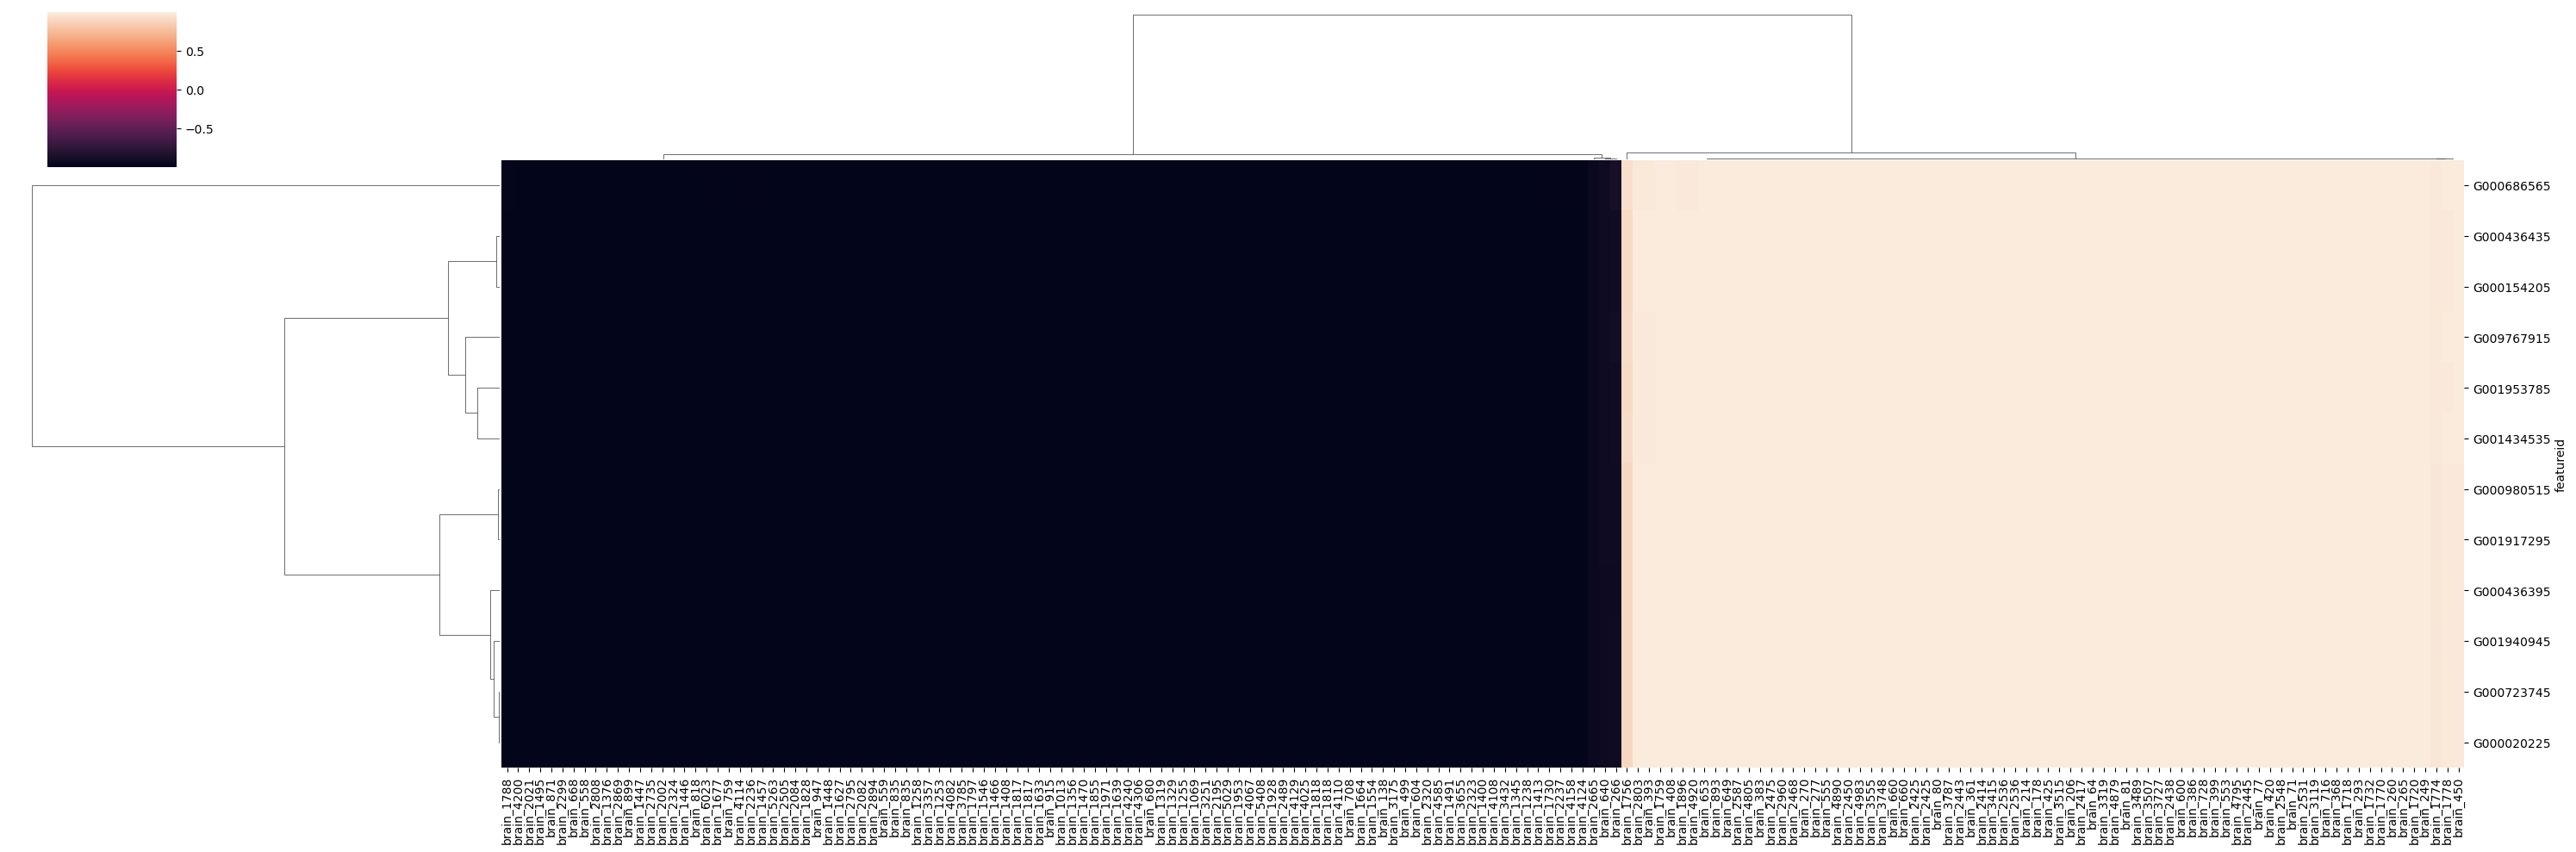

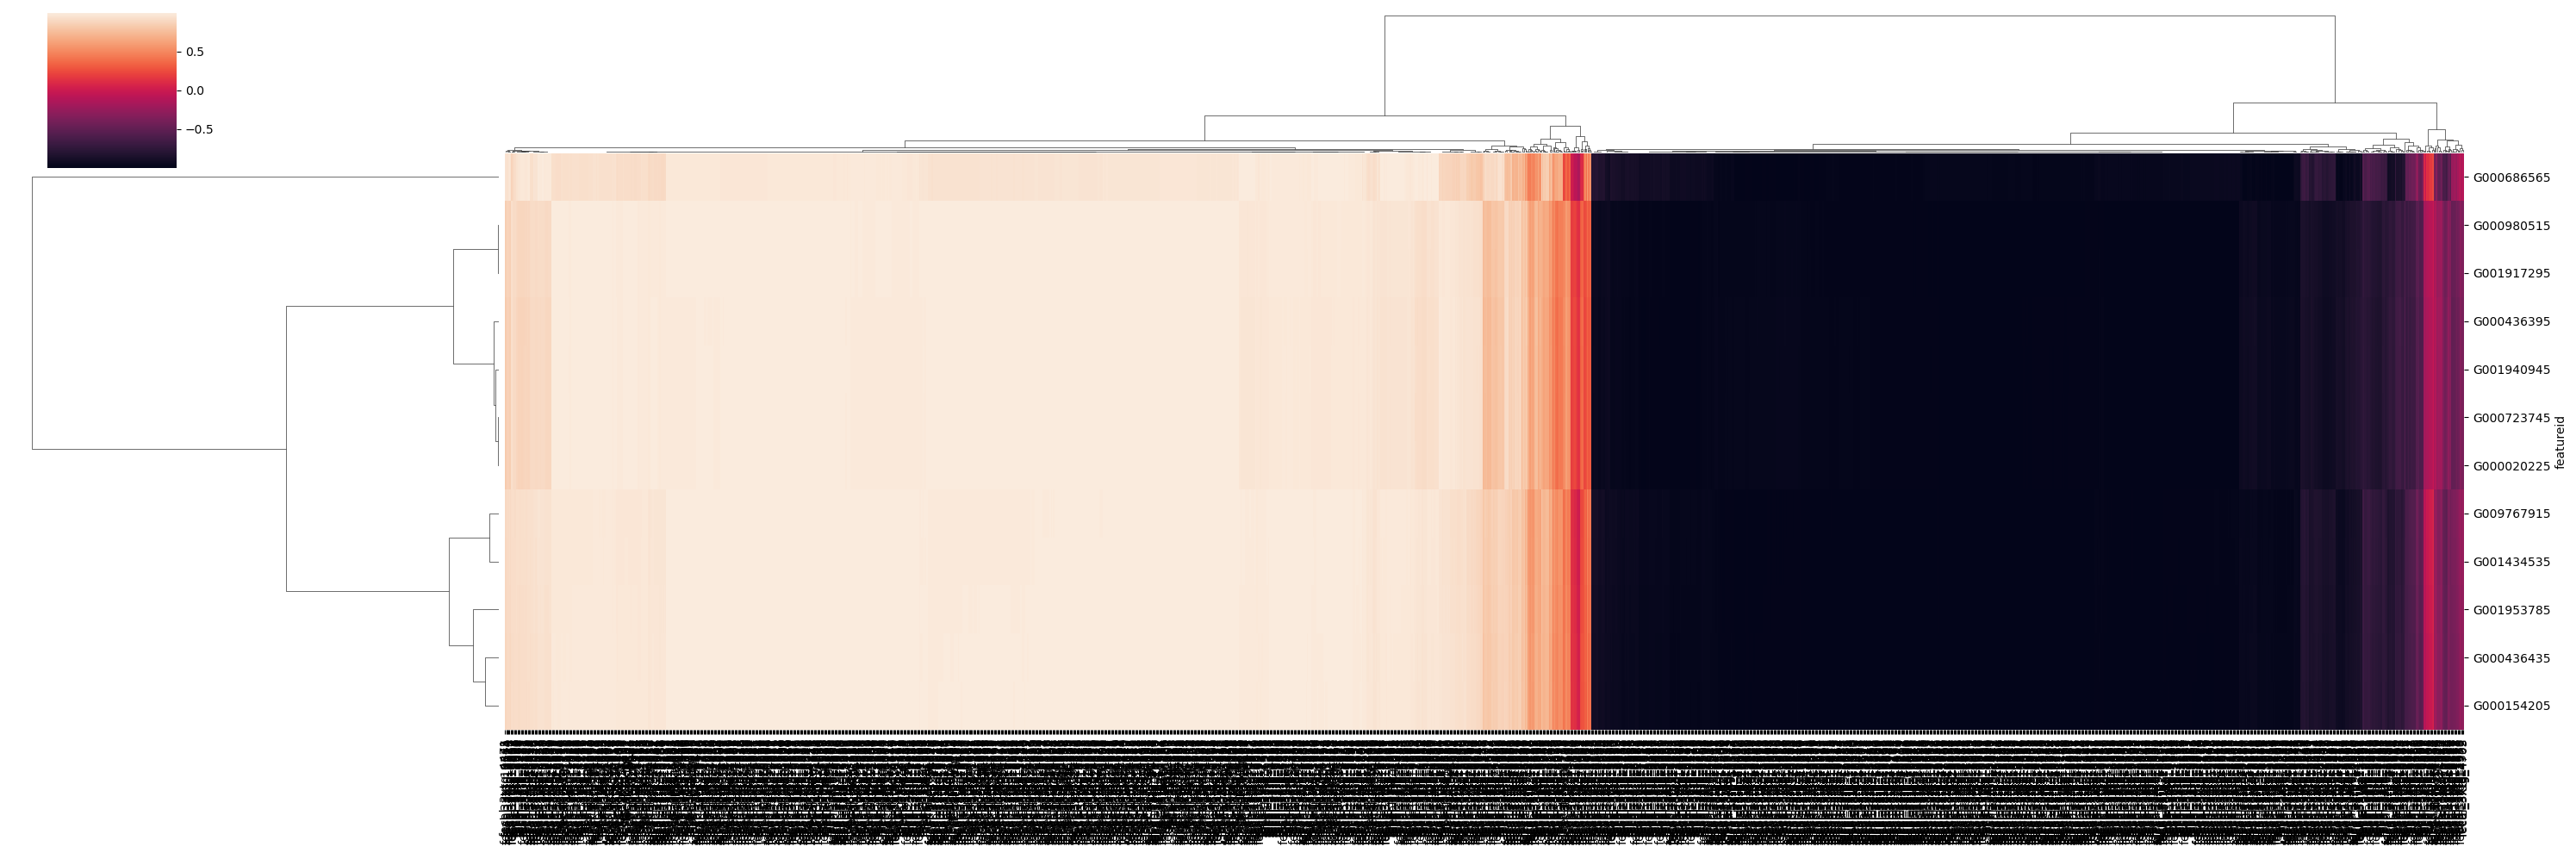

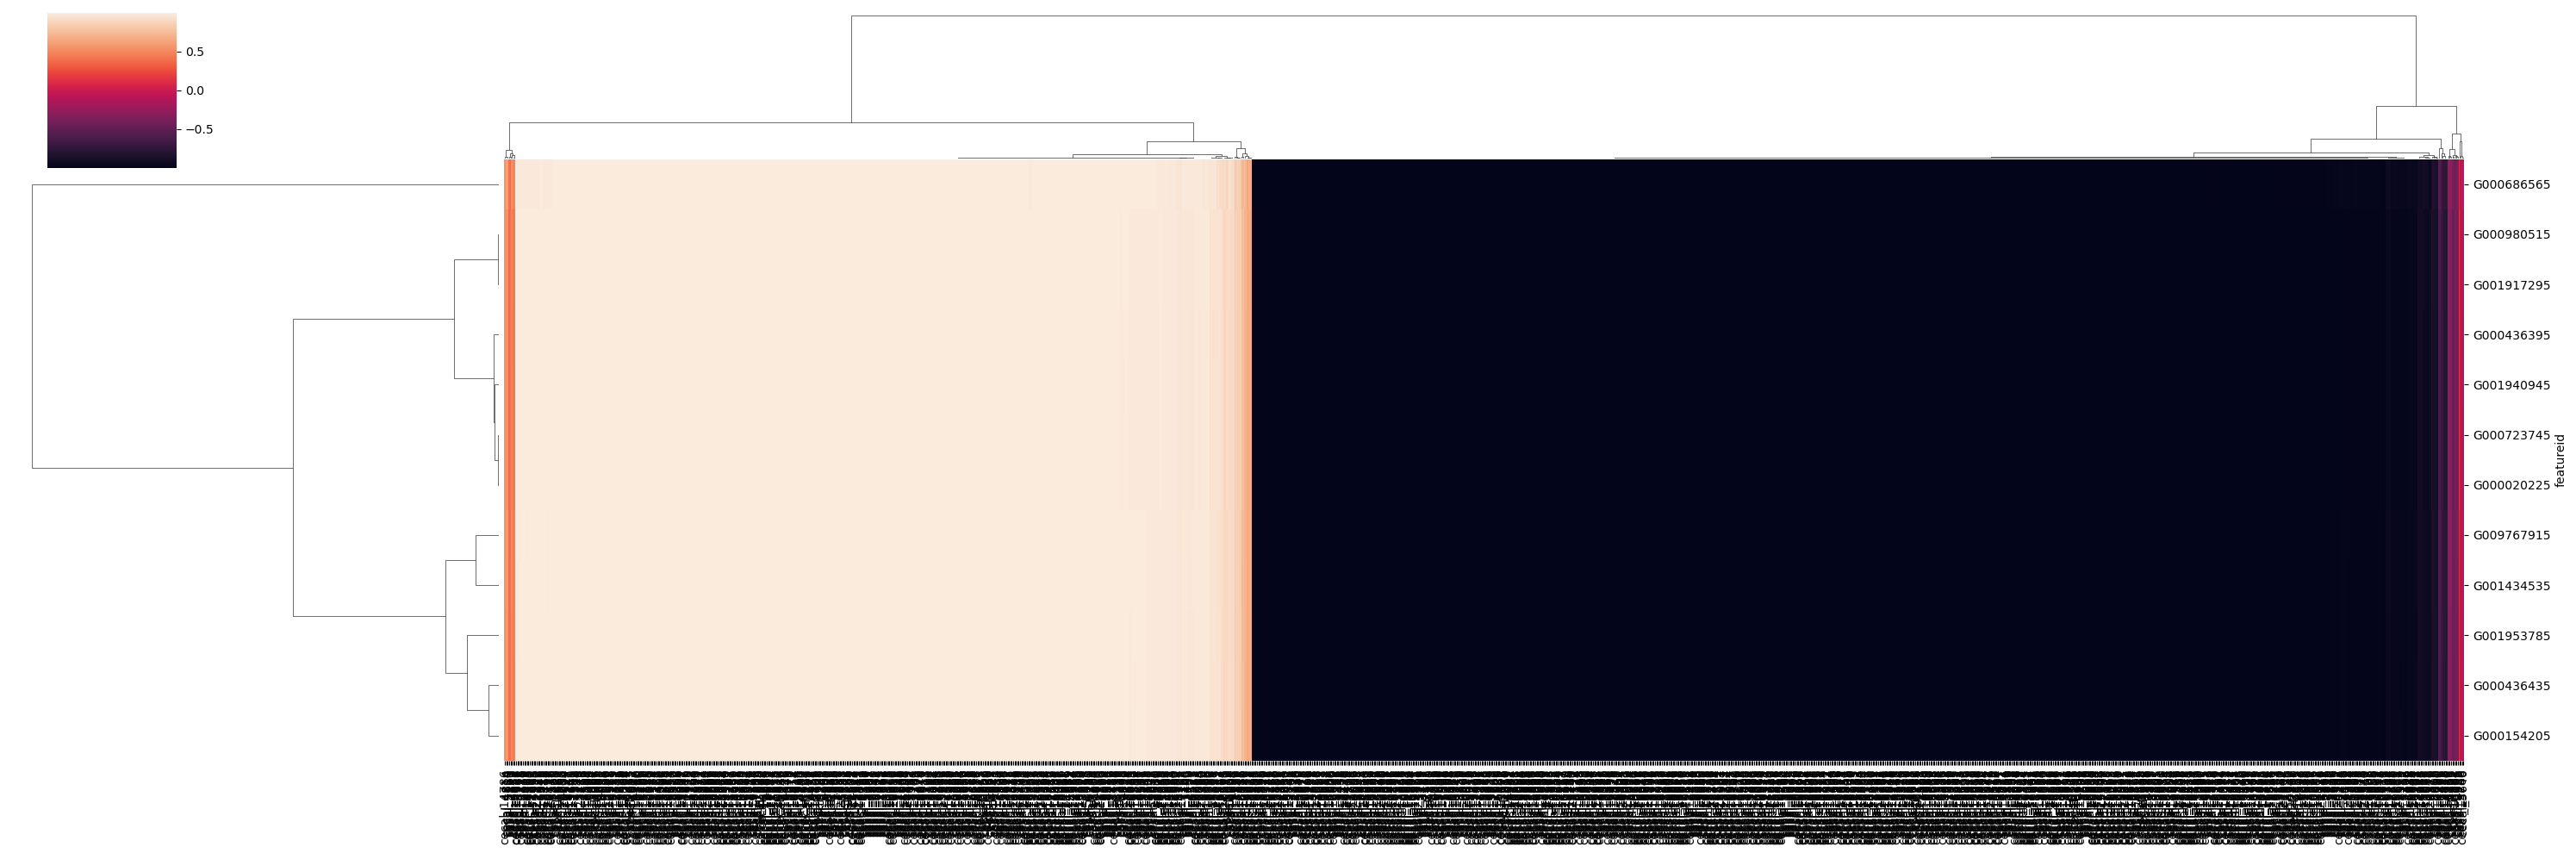

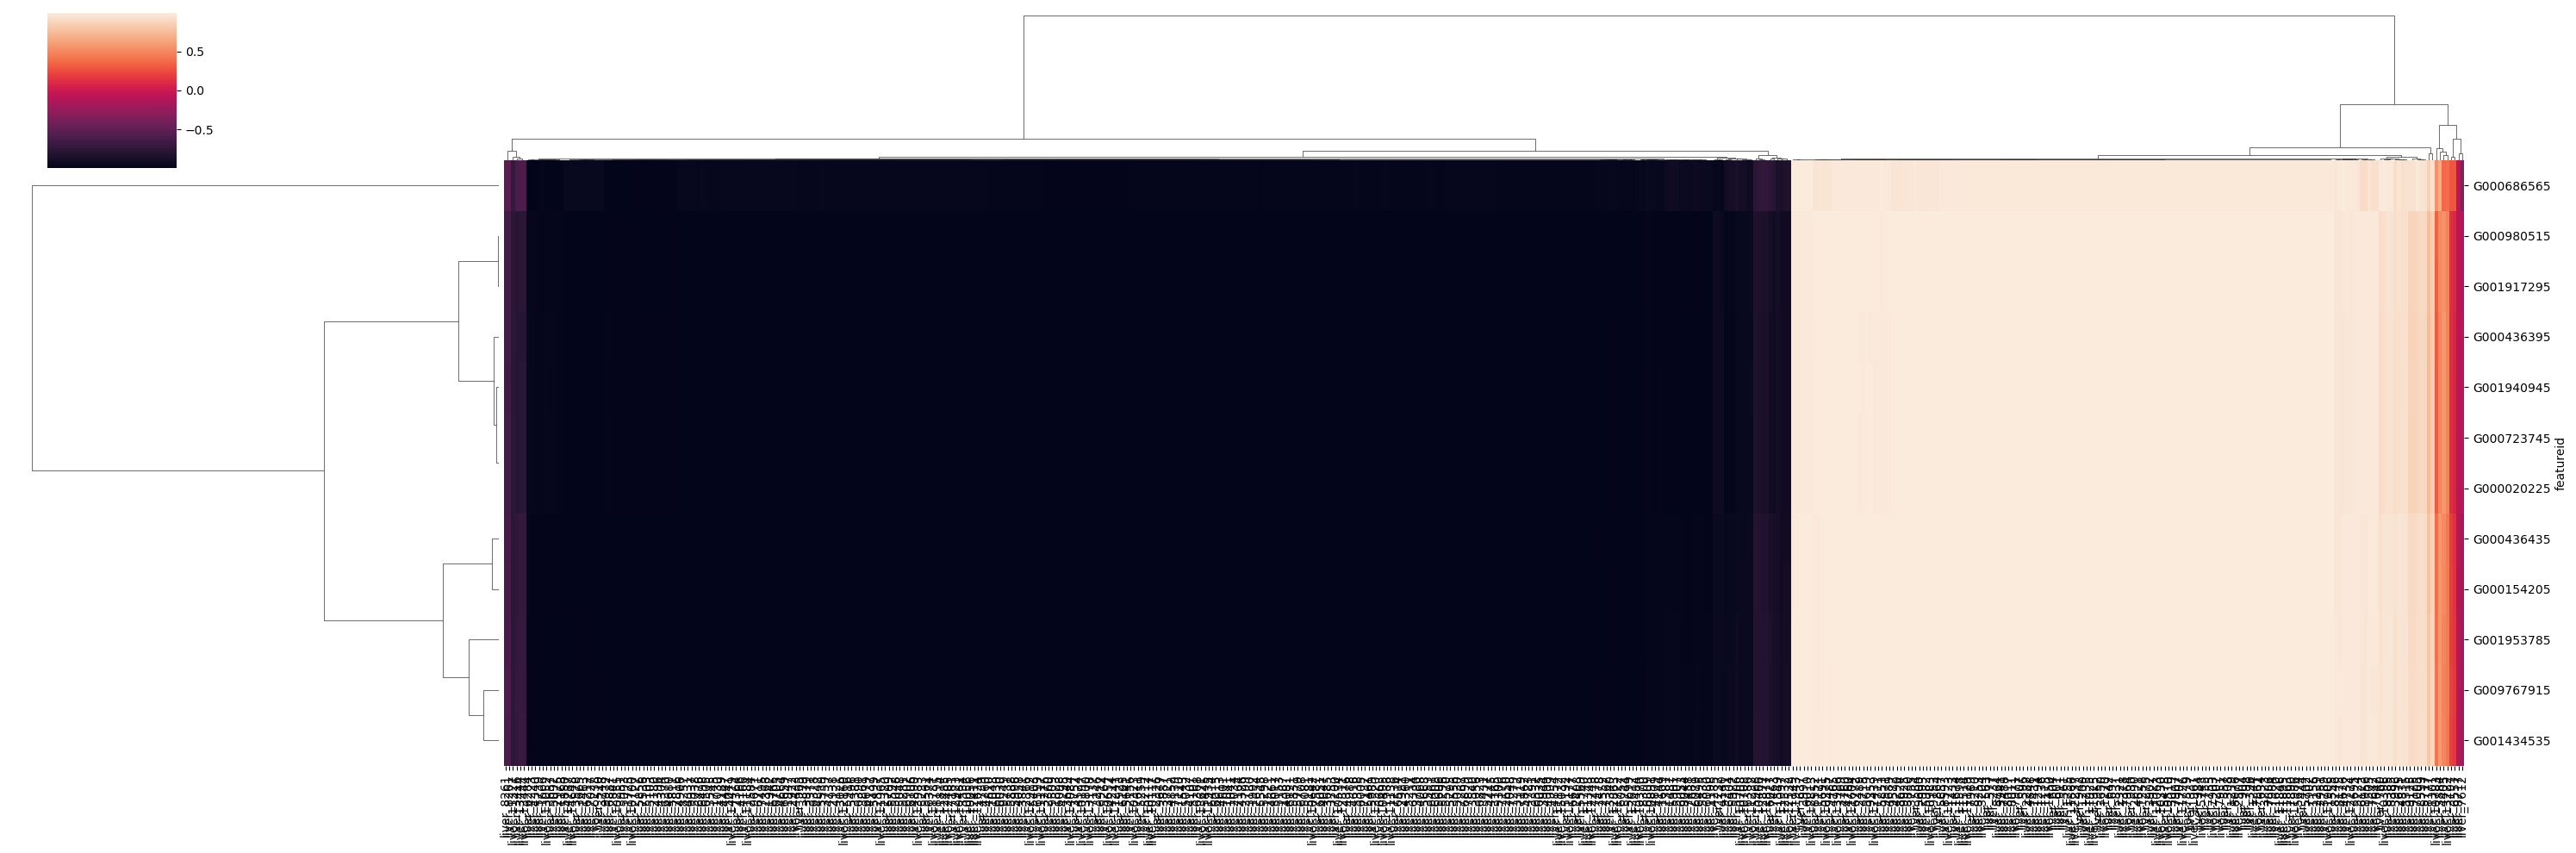

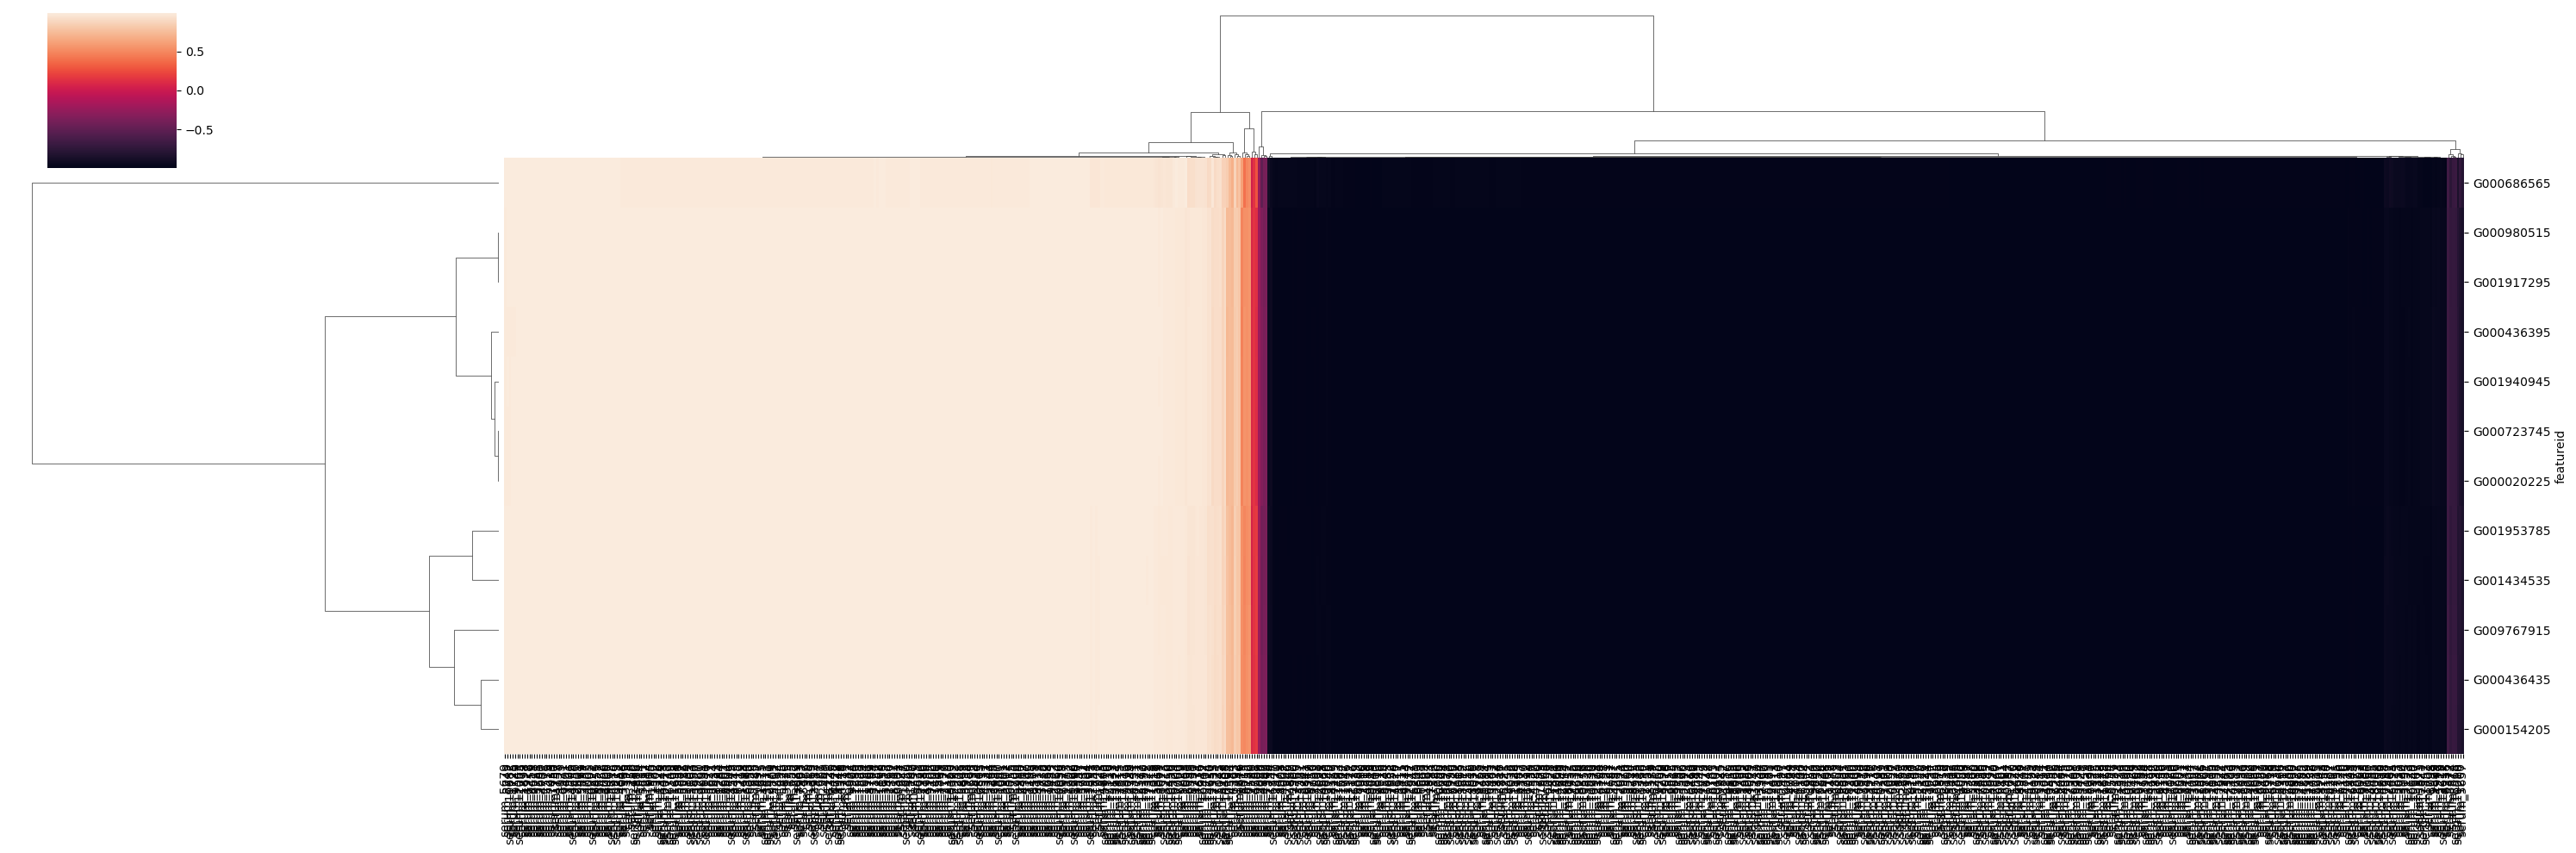

In [125]:
for table, name in [(brain_short, 'brain'), (fecal_short, 'fecal'), (cecal_short, 'cecal'), 
                    (liver_short, 'liver'), (serum_short, 'serum')]:
    sns.clustermap(table, xticklabels=True, yticklabels=True, figsize=(30, 10))
    plt.savefig(f'../data/Metabolome/paired_jointRPCA/{name}-rel_micro-topbot1_corr.png', dpi=150, bbox_inches='tight')
    plt.show()

## RPCA selected Metabs

In [126]:
# ordination_table = pd.read_csv('../../Multiomics/data/Metabolome/04062024/five-metab_joint_biplot/ordination_reformat.txt', 
#                                sep='\t', index_col=0, skiprows=7, header=None, low_memory=False)
# ordination_table.head()

1         2         3
0                                       
brain_65   -0.004786 -0.002575 -0.003486
brain_5270 -0.011647 -0.003817 -0.003475
brain_898  -0.017802 -0.002005  0.004603
brain_221  -0.014167 -0.012811 -0.024084
brain_572  -0.021003 -0.010704 -0.010611

In [158]:
brain_ranks = pd.read_csv('../data/Metabolome/paired_jointRPCA/brain-microbe_biplot-ordination/ordination_reformat.txt', 
                               sep='\t', index_col=0)
fecal_ranks = pd.read_csv('../data/Metabolome/paired_jointRPCA/fecal-microbe_biplot-ordination/ordination_reformat.txt', 
                               sep='\t', index_col=0)
cecal_ranks = pd.read_csv('../data/Metabolome/paired_jointRPCA/cecal-microbe_biplot-ordination/ordination_reformat.txt', 
                               sep='\t', index_col=0)
liver_ranks = pd.read_csv('../data/Metabolome/paired_jointRPCA/liver-microbe_biplot-ordination/ordination_reformat.txt', 
                               sep='\t', index_col=0)
serum_ranks = pd.read_csv('../data/Metabolome/paired_jointRPCA/serum-microbe_biplot-ordination/ordination_reformat.txt', 
                               sep='\t', index_col=0)
serum_ranks.head()

Axis 1 0.9993981799950599     Axis2     Axis3
serum_1099                  -0.005072  0.005485  0.000691
serum_131                    0.006990  0.001516  0.003803
serum_645                    0.009393  0.017483 -0.006794
serum_336                    0.026839 -0.001596 -0.000391
serum_278                    0.002212 -0.006750  0.005099

In [163]:
brain_top_ranks = brain_ranks[(brain_ranks['Axis 1 0.999652831']> 0.02) | (brain_ranks['Axis 1 0.999652831']< -0.02)]
fecal_top_ranks = fecal_ranks[(fecal_ranks['Axis 1 0.9959181082263274']> 0.02) | (fecal_ranks['Axis 1 0.9959181082263274']< -0.02)]
cecal_top_ranks = cecal_ranks[(cecal_ranks['Axis 1 0.9997351058820745']> 0.02) | (cecal_ranks['Axis 1 0.9997351058820745']< -0.02)]
liver_top_ranks = liver_ranks[(liver_ranks['Axis 1 0.9985103891123537']> 0.02) | (liver_ranks['Axis 1 0.9985103891123537']< -0.02)]
serum_top_ranks = serum_ranks[(serum_ranks['Axis 1 0.9993981799950599']> 0.02) | (serum_ranks['Axis 1 0.9993981799950599']< -0.02)]
serum_top_ranks.shape

(306, 3)

In [165]:
brain_ord = list(brain_top_ranks.index.values)
print("number of key brain metab from single-tissue RPCA ordination", len(brain_ord))
fecal_ord = list(fecal_top_ranks.index.values)
print("number of key fecal metab from single-tissue RPCA ordination", len(fecal_ord))
cecal_ord = list(cecal_top_ranks.index.values)
print("number of key cecal metab from single-tissue RPCA ordination", len(cecal_ord))
liver_ord = list(liver_top_ranks.index.values)
print("number of key liver metab from single-tissue RPCA ordination", len(liver_ord))
serum_ord = list(serum_top_ranks.index.values)
print("number of key serum metab from single-tissue RPCA ordination", len(serum_ord))

number of key brain metab from single-tissue RPCA ordination 187
number of key fecal metab from single-tissue RPCA ordination 285
number of key cecal metab from single-tissue RPCA ordination 359
number of key liver metab from single-tissue RPCA ordination 308
number of key serum metab from single-tissue RPCA ordination 306


In [166]:
brain_rpca = relevant_filter(brain_filt, brain_ord)
fecal_rpca = relevant_filter(fecal_filt, fecal_ord)
cecal_rpca = relevant_filter(cecal_filt, cecal_ord)
liver_rpca = relevant_filter(liver_filt, liver_ord)
serum_rpca = relevant_filter(serum_filt, serum_ord)

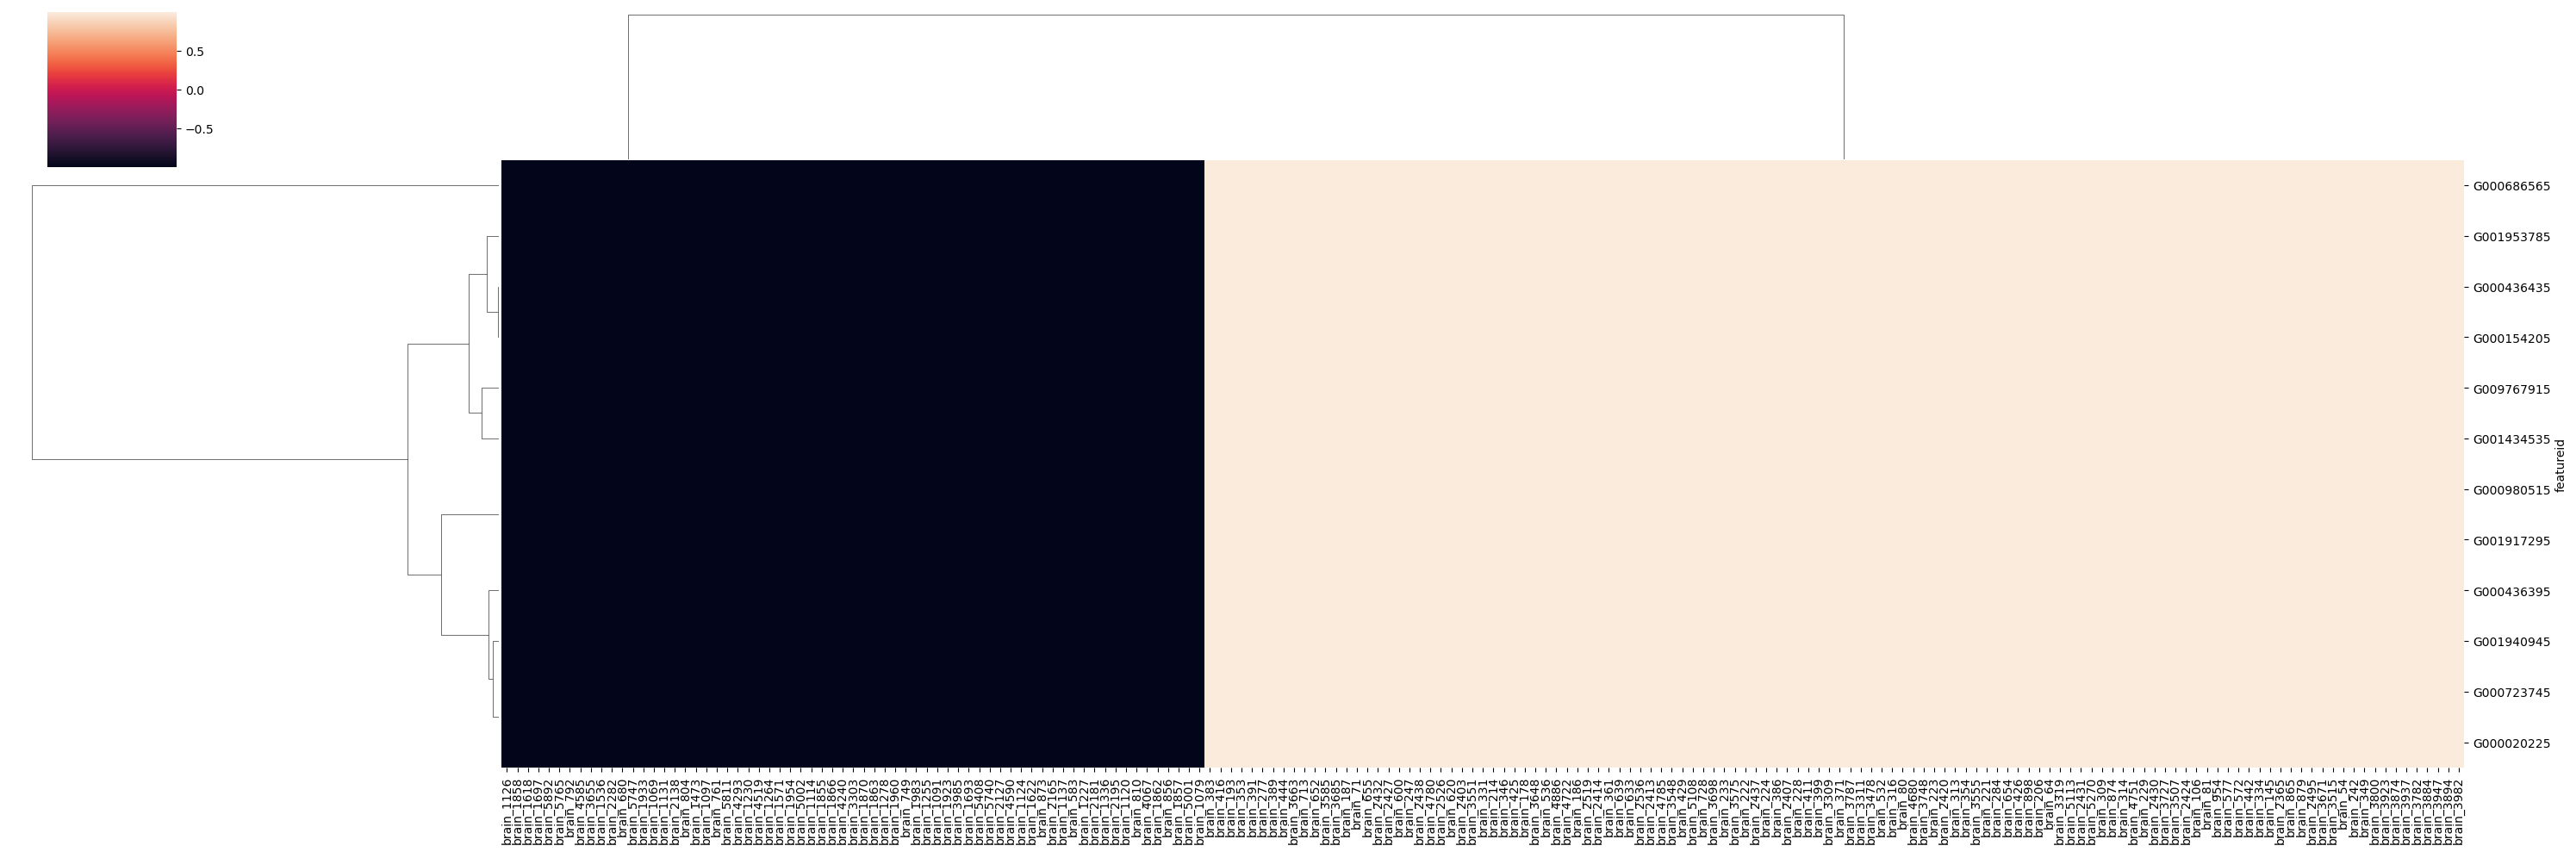

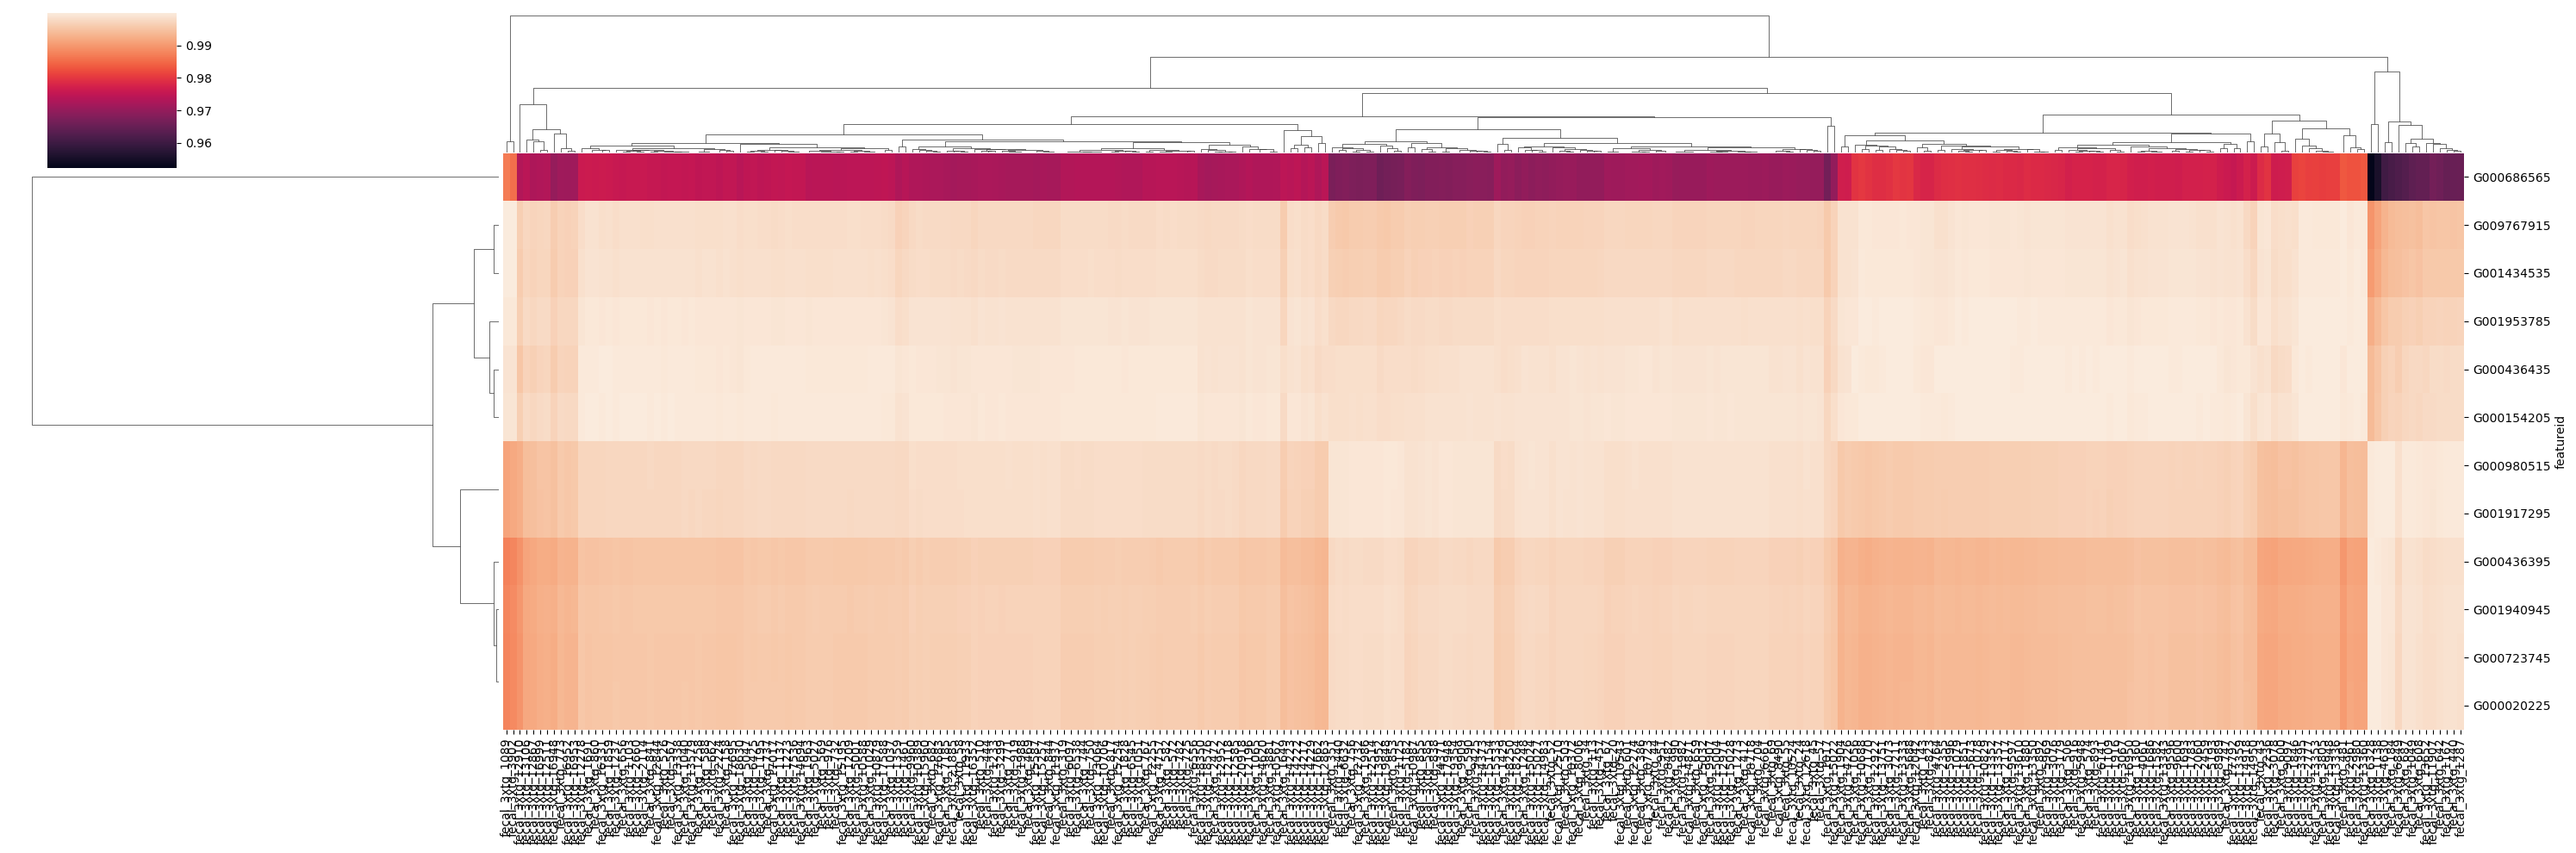

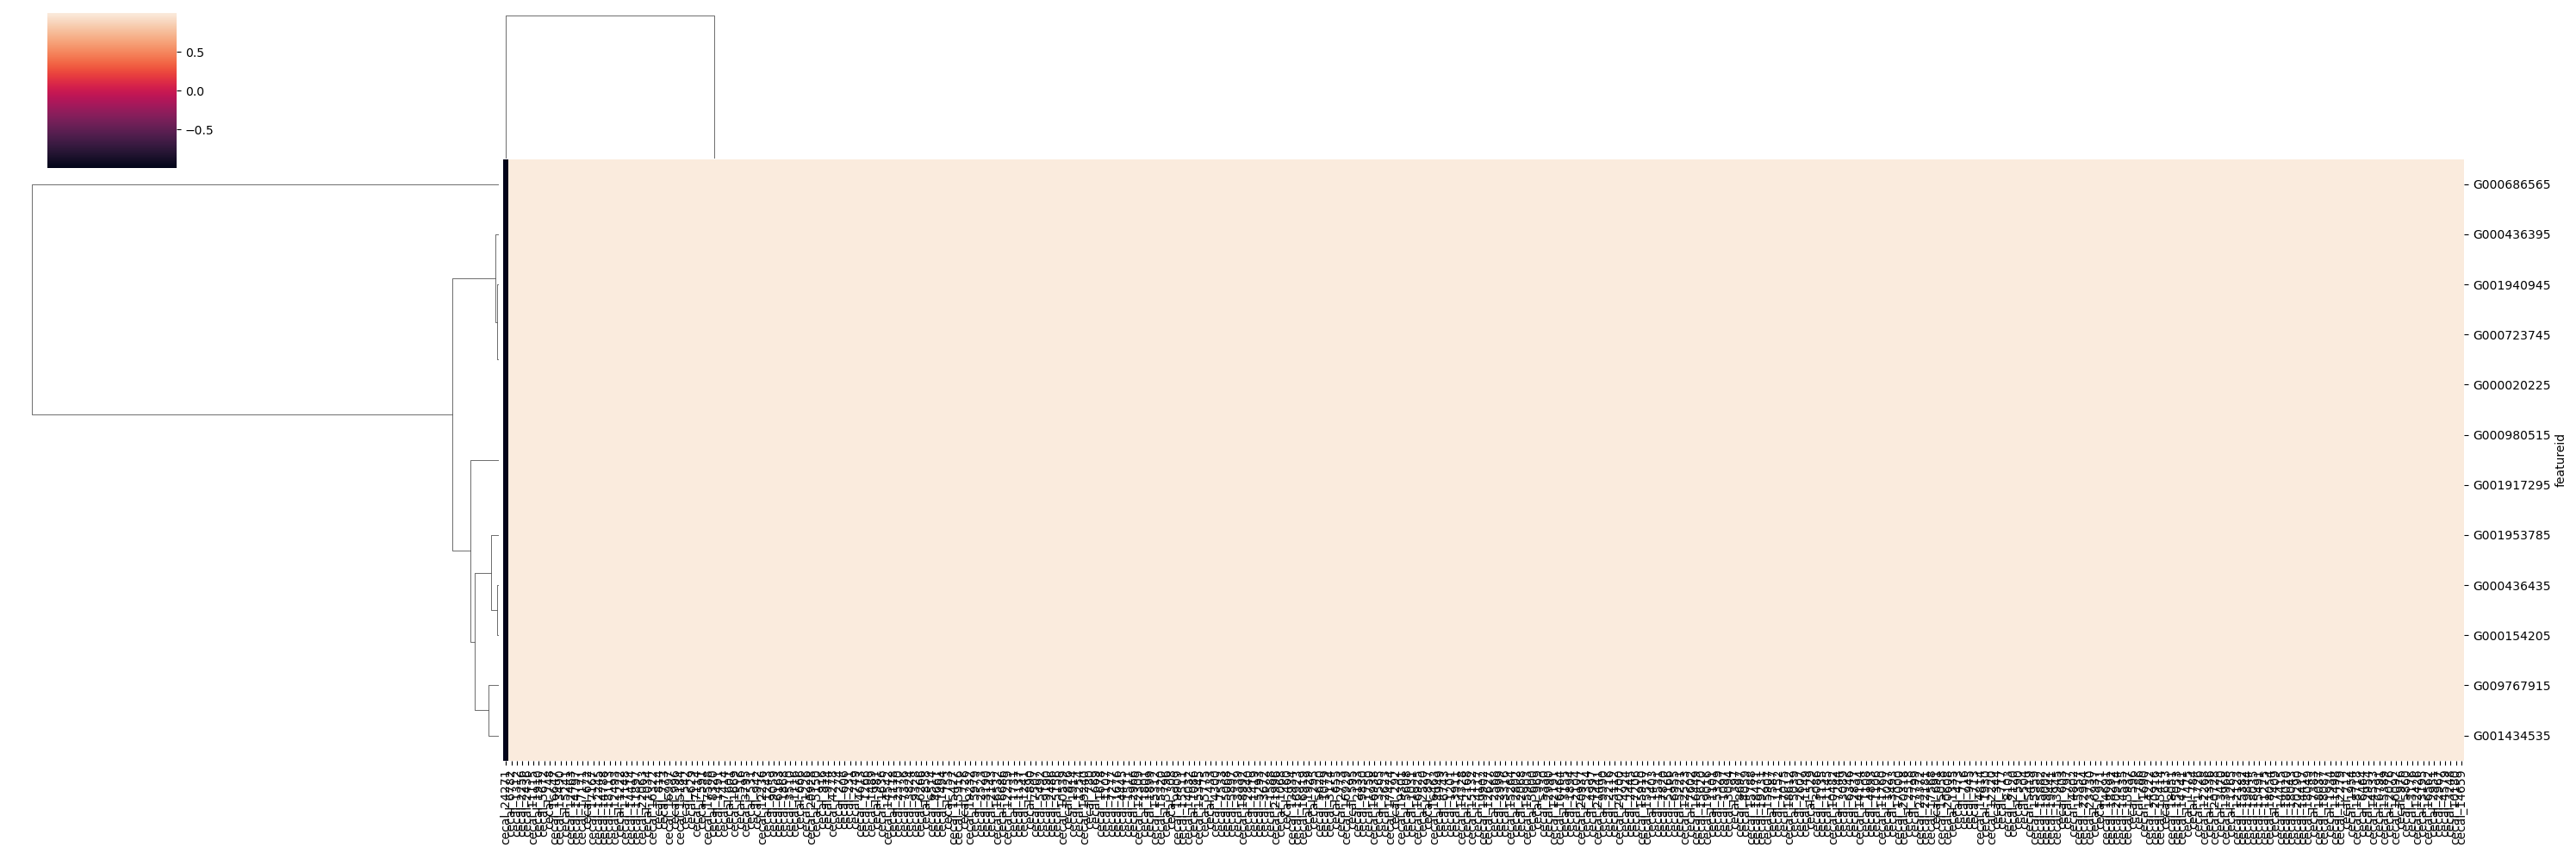

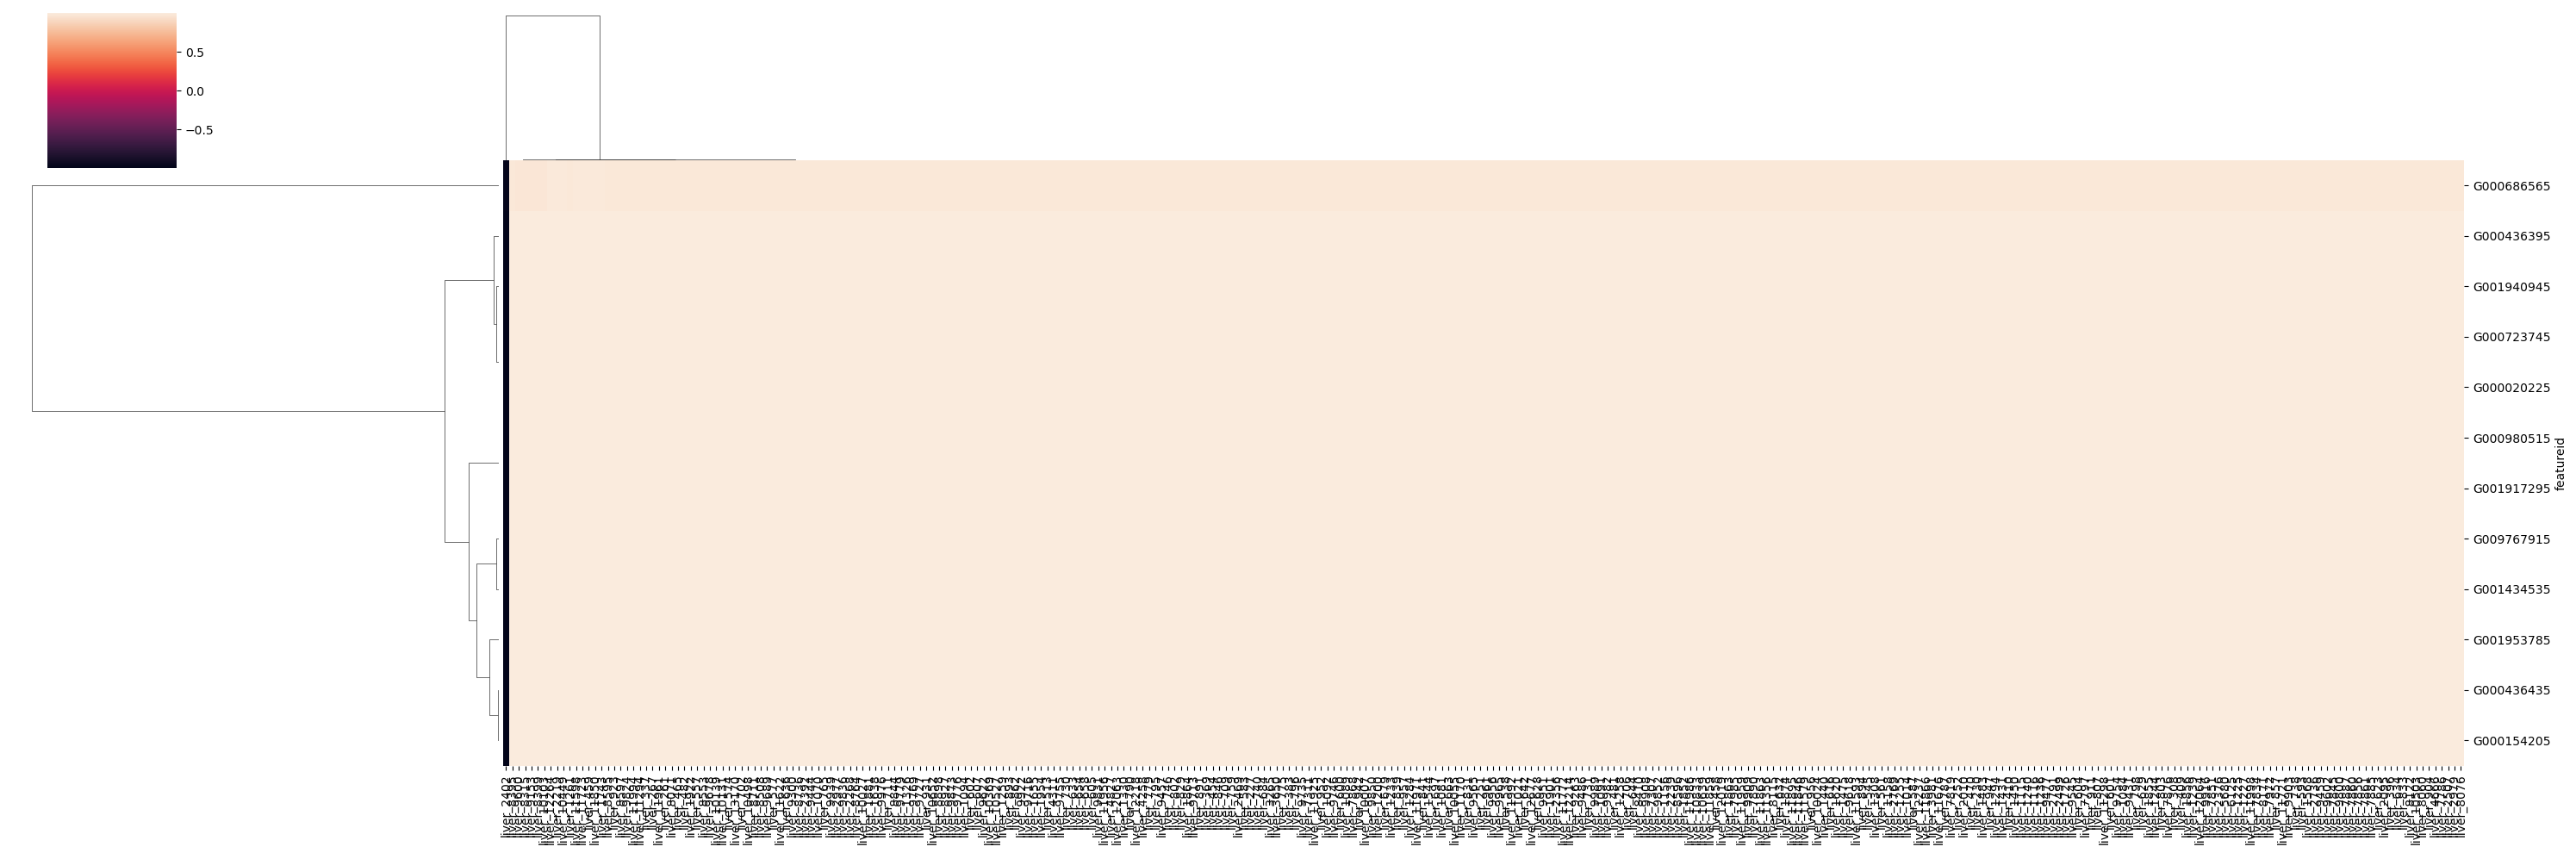

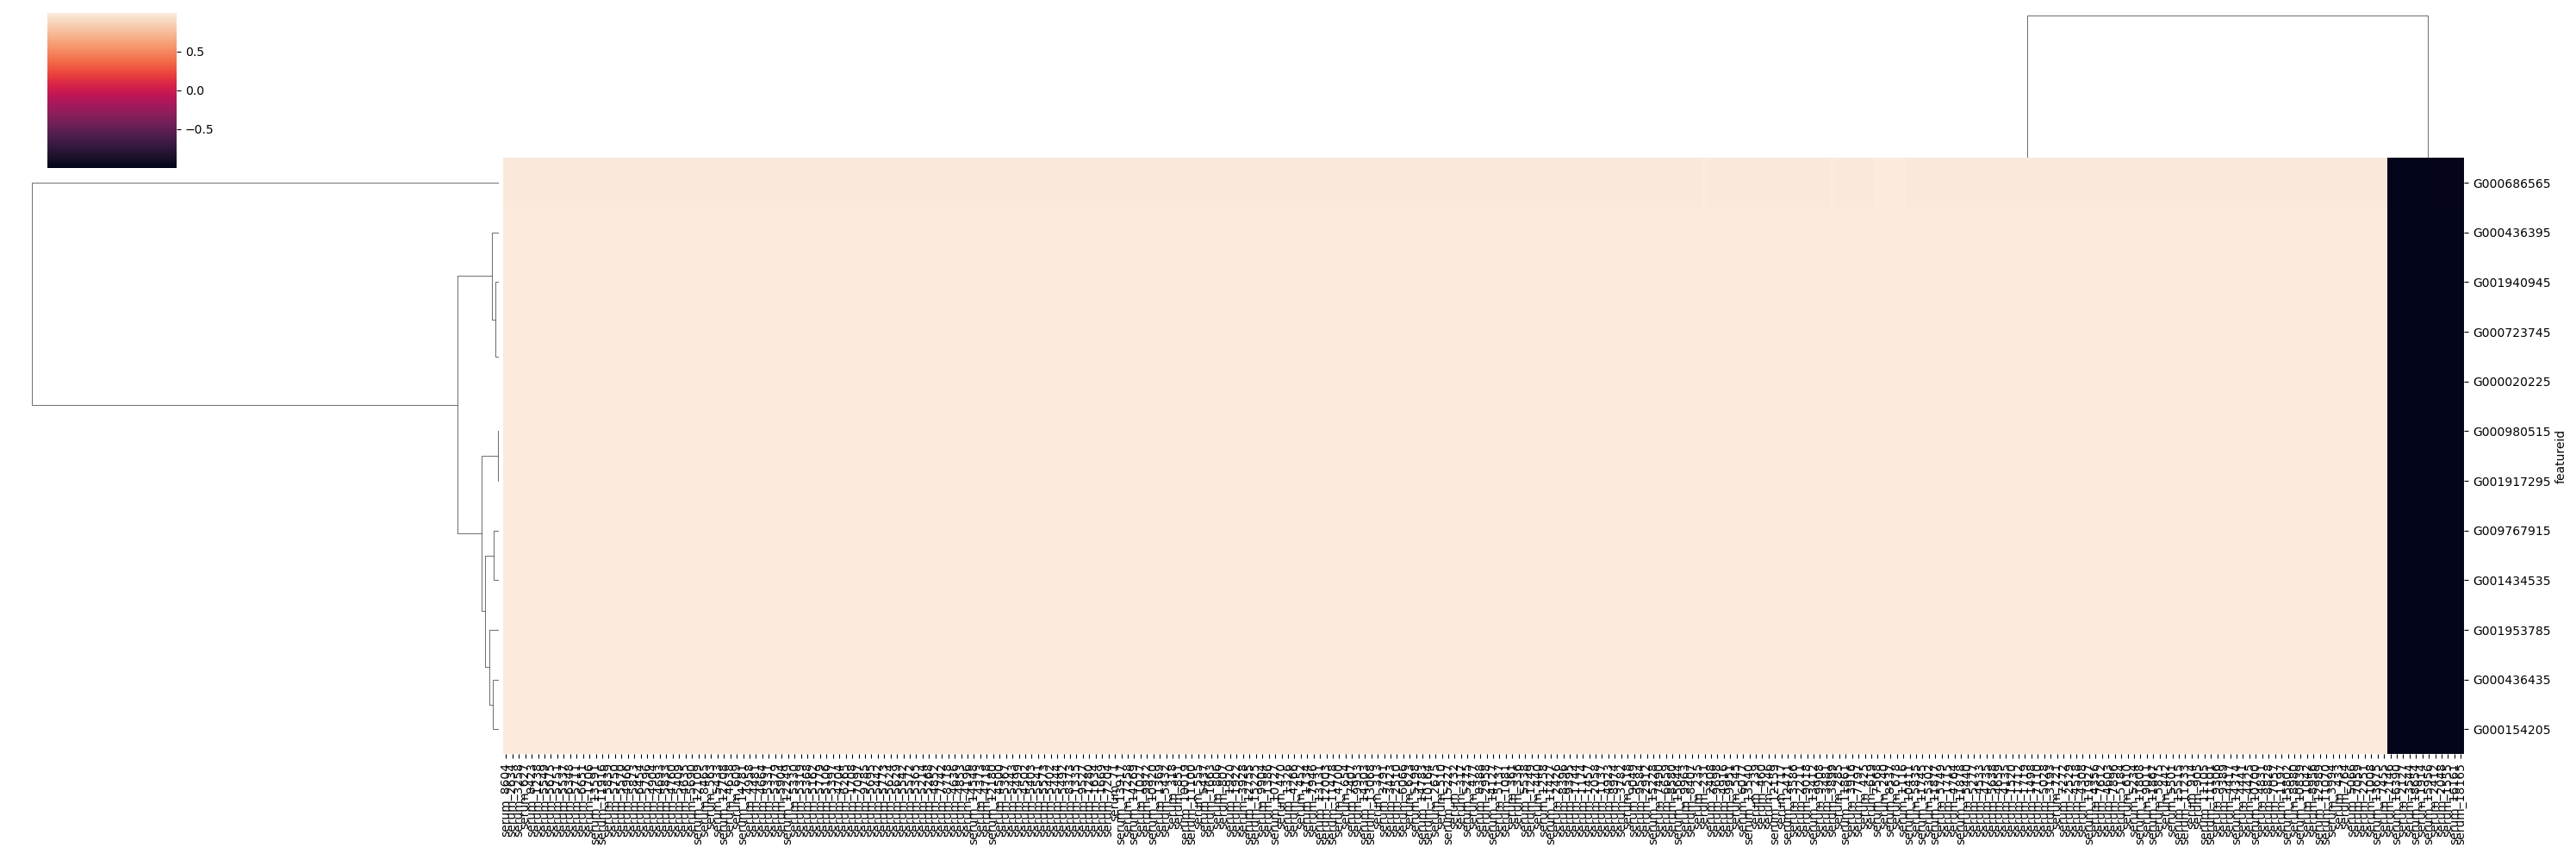

In [167]:
for table, name in [(brain_rpca, 'brain'), (fecal_rpca, 'fecal'), (cecal_rpca, 'cecal'), 
                    (liver_rpca, 'liver'), (serum_rpca, 'serum')]:
    sns.clustermap(table, xticklabels=True, yticklabels=True, figsize=(30, 10))
    plt.savefig(f'../data/Metabolome/paired_jointRPCA/{name}-rpca-ord_micro-topbot1_corr.png', dpi=150, bbox_inches='tight')
    plt.show()

### Annotations

In [18]:
taxonomy = pd.read_csv('../data/Microbiome/sacrifice/RPCA/sac_phyloRPCA-taxonomy/taxonomy.tsv', 
                       sep='\t', index_col=0)
taxonomy.head()

Taxon
Feature ID                                                   
n1264               d__Bacteria; p__; c__; o__; f__; g__; s__
G001421185          d__Bacteria; p__; c__; o__; f__; g__; s__
n1263               d__Bacteria; p__; c__; o__; f__; g__; s__
n1260       d__Bacteria; p__Patescibacteria; c__Saccharimo...
G004561445  d__Bacteria; p__Patescibacteria; c__Saccharimo...

In [19]:
annot = pd.read_csv('../data/Metabolome/5XFAD_fbmn.tsv', sep='\t', 
                    usecols=['#Scan#', 'Compound_Name'], index_col=1)
annot.index = annot.index.astype(str)
annot.head()

Compound_Name
#Scan#                                                   
927                                  NORLEUCINE - 40.0 eV
13008   Spectral Match to 1-Hexadecanoyl-2-(9Z-octadec...
11481   Spectral Match to 1-Hexadecanoyl-2-(9Z-octadec...
654                           2'-DEOXYADENOSINE - 20.0 eV
15733   Spectral Match to 1-(9Z-Octadecenoyl)-2-tetrad...

In [27]:
ctable = correlation_table.copy()
ctable4 = ctable.filter(micro, axis=0)
ctable5 = ctable4.filter(list(annot.index.astype(str)), axis=1)
ctable5.shape

(43, 309)

In [28]:
ctable5.head()

927       654       724      1314      3027      5236  \
featureid                                                                
G000403435  0.895704  0.995728  0.957152  0.877906  0.457608  0.736115   
G000020225  0.999910  0.928012  0.983767  0.999685  0.813140  0.963968   
G001917295  0.999946  0.929135  0.984305  0.999604  0.811374  0.963158   
G000723745  0.999612  0.922545  0.981078  0.999943  0.821445  0.967702   
G000436395  0.999930  0.928613  0.984056  0.999643  0.812197  0.963536   

                7211       455      3114      1406  ...      1949      9834  \
featureid                                           ...                       
G000403435  0.660468  0.993241 -0.290177  0.525583  ... -0.956418  0.912066   
G000020225  0.930459  0.936637  0.178843  0.856073  ... -0.984217  0.998663   
G001917295  0.929346  0.937693  0.175865  0.854504  ... -0.984748  0.998815   
G000723745  0.935644  0.931491  0.193006  0.863434  ... -0.981564  0.997814   
G000436395  0.929865  0.937203  0.177251  0.855235  ... -0.984502  0.998745   

                8232      4088      9454      3253      1181      3515  \
featureid                                                                
G000403435 -0.692813 -0.982741 -0.995715  0.969314 -0.734962  0.561169   
G000020225 -0.945656 -0.958767 -0.928065  0.974604 -0.344202  0.877210   
G001917295 -0.944667 -0.959622 -0.929188  0.975277 -0.347042  0.875753   
G000723745 -0.950245 -0.954571 -0.922601  0.971275 -0.330632  0.884039   
G000436395 -0.945129 -0.959225 -0.928667  0.974965 -0.345720  0.876433   

                9580      3535  
featureid                       
G000403435 -0.823035  0.904343  
G000020225 -0.991583  0.999447  
G001917295 -0.991186  0.999543  
G000723745 -0.993346  0.998864  
G000436395 -0.991372  0.999499  

[5 rows x 309 columns]

In [29]:
renamed = pd.merge(ctable5.T, annot, left_index=True, right_index=True)
renamed.set_index('Compound_Name', inplace=True)
renamed2 = renamed.T.copy()
renamed2.head()

Compound_Name  NORLEUCINE - 40.0 eV  2'-DEOXYADENOSINE - 20.0 eV  \
G000403435                 0.895704                     0.995728   
G000020225                 0.999910                     0.928012   
G001917295                 0.999946                     0.929135   
G000723745                 0.999612                     0.922545   
G000436395                 0.999930                     0.928613   

Compound_Name  Acetylcarnitine - 20.00 eV  Phenylalanine - 20.00 eV  \
G000403435                       0.957152                  0.877906   
G000020225                       0.983767                  0.999685   
G001917295                       0.984305                  0.999604   
G000723745                       0.981078                  0.999943   
G000436395                       0.984056                  0.999643   

Compound_Name  Spectral Match to Phe-Pro from NIST14  \
G000403435                                  0.457608   
G000020225                                  0.813140   
G001917295                                  0.811374   
G000723745                                  0.821445   
G000436395                                  0.812197   

Compound_Name  Spectral Match to Urobilin from NIST14  \
G000403435                                   0.736115   
G000020225                                   0.963968   
G001917295                                   0.963158   
G000723745                                   0.967702   
G000436395                                   0.963536   

Compound_Name  Spectral Match to Cholic acid from NIST14  \
G000403435                                      0.660468   
G000020225                                      0.930459   
G001917295                                      0.929346   
G000723745                                      0.935644   
G000436395                                      0.929865   

Compound_Name  Carnitine - 40.00 eV  Spectral Match to Phe-Leu from NIST14  \
G000403435                 0.993241                              -0.290177   
G000020225                 0.936637                               0.178843   
G001917295                 0.937693                               0.175865   
G000723745                 0.931491                               0.193006   
G000436395                 0.937203                               0.177251   

Compound_Name  Spectral Match to Gly-Leu from NIST14  ...  \
G000403435                                  0.525583  ...   
G000020225                                  0.856073  ...   
G001917295                                  0.854504  ...   
G000723745                                  0.863434  ...   
G000436395                                  0.855235  ...   

Compound_Name  Massbank:AU230701 Secobarbital|5-pentan-2-yl-5-prop-2-enyl-1,3-diazinane-2,4,6-trione  \
G000403435                                             -0.956418                                       
G000020225                                             -0.984217                                       
G001917295                                             -0.984748                                       
G000723745                                             -0.981564                                       
G000436395                                             -0.984502                                       

Compound_Name  Spectral Match to 1-Linoleoylglycerol from NIST14  \
G000403435                                              0.912066   
G000020225                                              0.998663   
G001917295                                              0.998815   
G000723745                                              0.997814   
G000436395                                              0.998745   

Compound_Name  putrescine-C22:6  \
G000403435            -0.692813   
G000020225            -0.945656   
G001917295            -0.944667   
G000723745            -0.950245   
G000436395            -0.945129   

Compound_Name  Massbank:AC000281 Wallemino

In [30]:
renamed3 = pd.merge(renamed2, taxonomy, left_index=True, right_index=True)
renamed4 = renamed3.set_index('Taxon')
renamed4.head()

NORLEUCINE - 40.0 eV  \
Taxon                                                                      
d__Bacteria; p__Firmicutes_A; c__Clostridia; o_...              0.895704   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...              0.999910   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...              0.999946   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...              0.999612   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...              0.999930   

                                                    2'-DEOXYADENOSINE - 20.0 eV  \
Taxon                                                                             
d__Bacteria; p__Firmicutes_A; c__Clostridia; o_...                     0.995728   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                     0.928012   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                     0.929135   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                     0.922545   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                     0.928613   

                                                    Acetylcarnitine - 20.00 eV  \
Taxon                                                                            
d__Bacteria; p__Firmicutes_A; c__Clostridia; o_...                    0.957152   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                    0.983767   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                    0.984305   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                    0.981078   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                    0.984056   

                                                    Phenylalanine - 20.00 eV  \
Taxon                                                                          
d__Bacteria; p__Firmicutes_A; c__Clostridia; o_...                  0.877906   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                  0.999685   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                  0.999604   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                  0.999943   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                  0.999643   

                                                    Spectral Match to Phe-Pro from NIST14  \
Taxon                                                                                       
d__Bacteria; p__Firmicutes_A; c__Clostridia; o_...                               0.457608   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                               0.813140   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                               0.811374   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                               0.821445   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                               0.812197   

                                                    Spectral Match to Urobilin from NIST14  \
Taxon                                                                                        
d__Bacteria; p__Firmicutes_A; c__Clostridia; o_...                                0.736115   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                                0.963968   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                                0.963158   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                                0.967702   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                                0.963536   

                                                    Spectral Match to Cholic acid from NIST14  \
Taxon                                                                                           
d__Bacteria; p__Firmicutes_A; c__Clostridia; o_...                                   0.660468   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                                   0.930459   
d__Bacteria; p__Verrucomicrobiota; c__Verrucomi...                                   0.929346   
d__Ba

In [31]:
renamed4.shape

(43, 309)

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


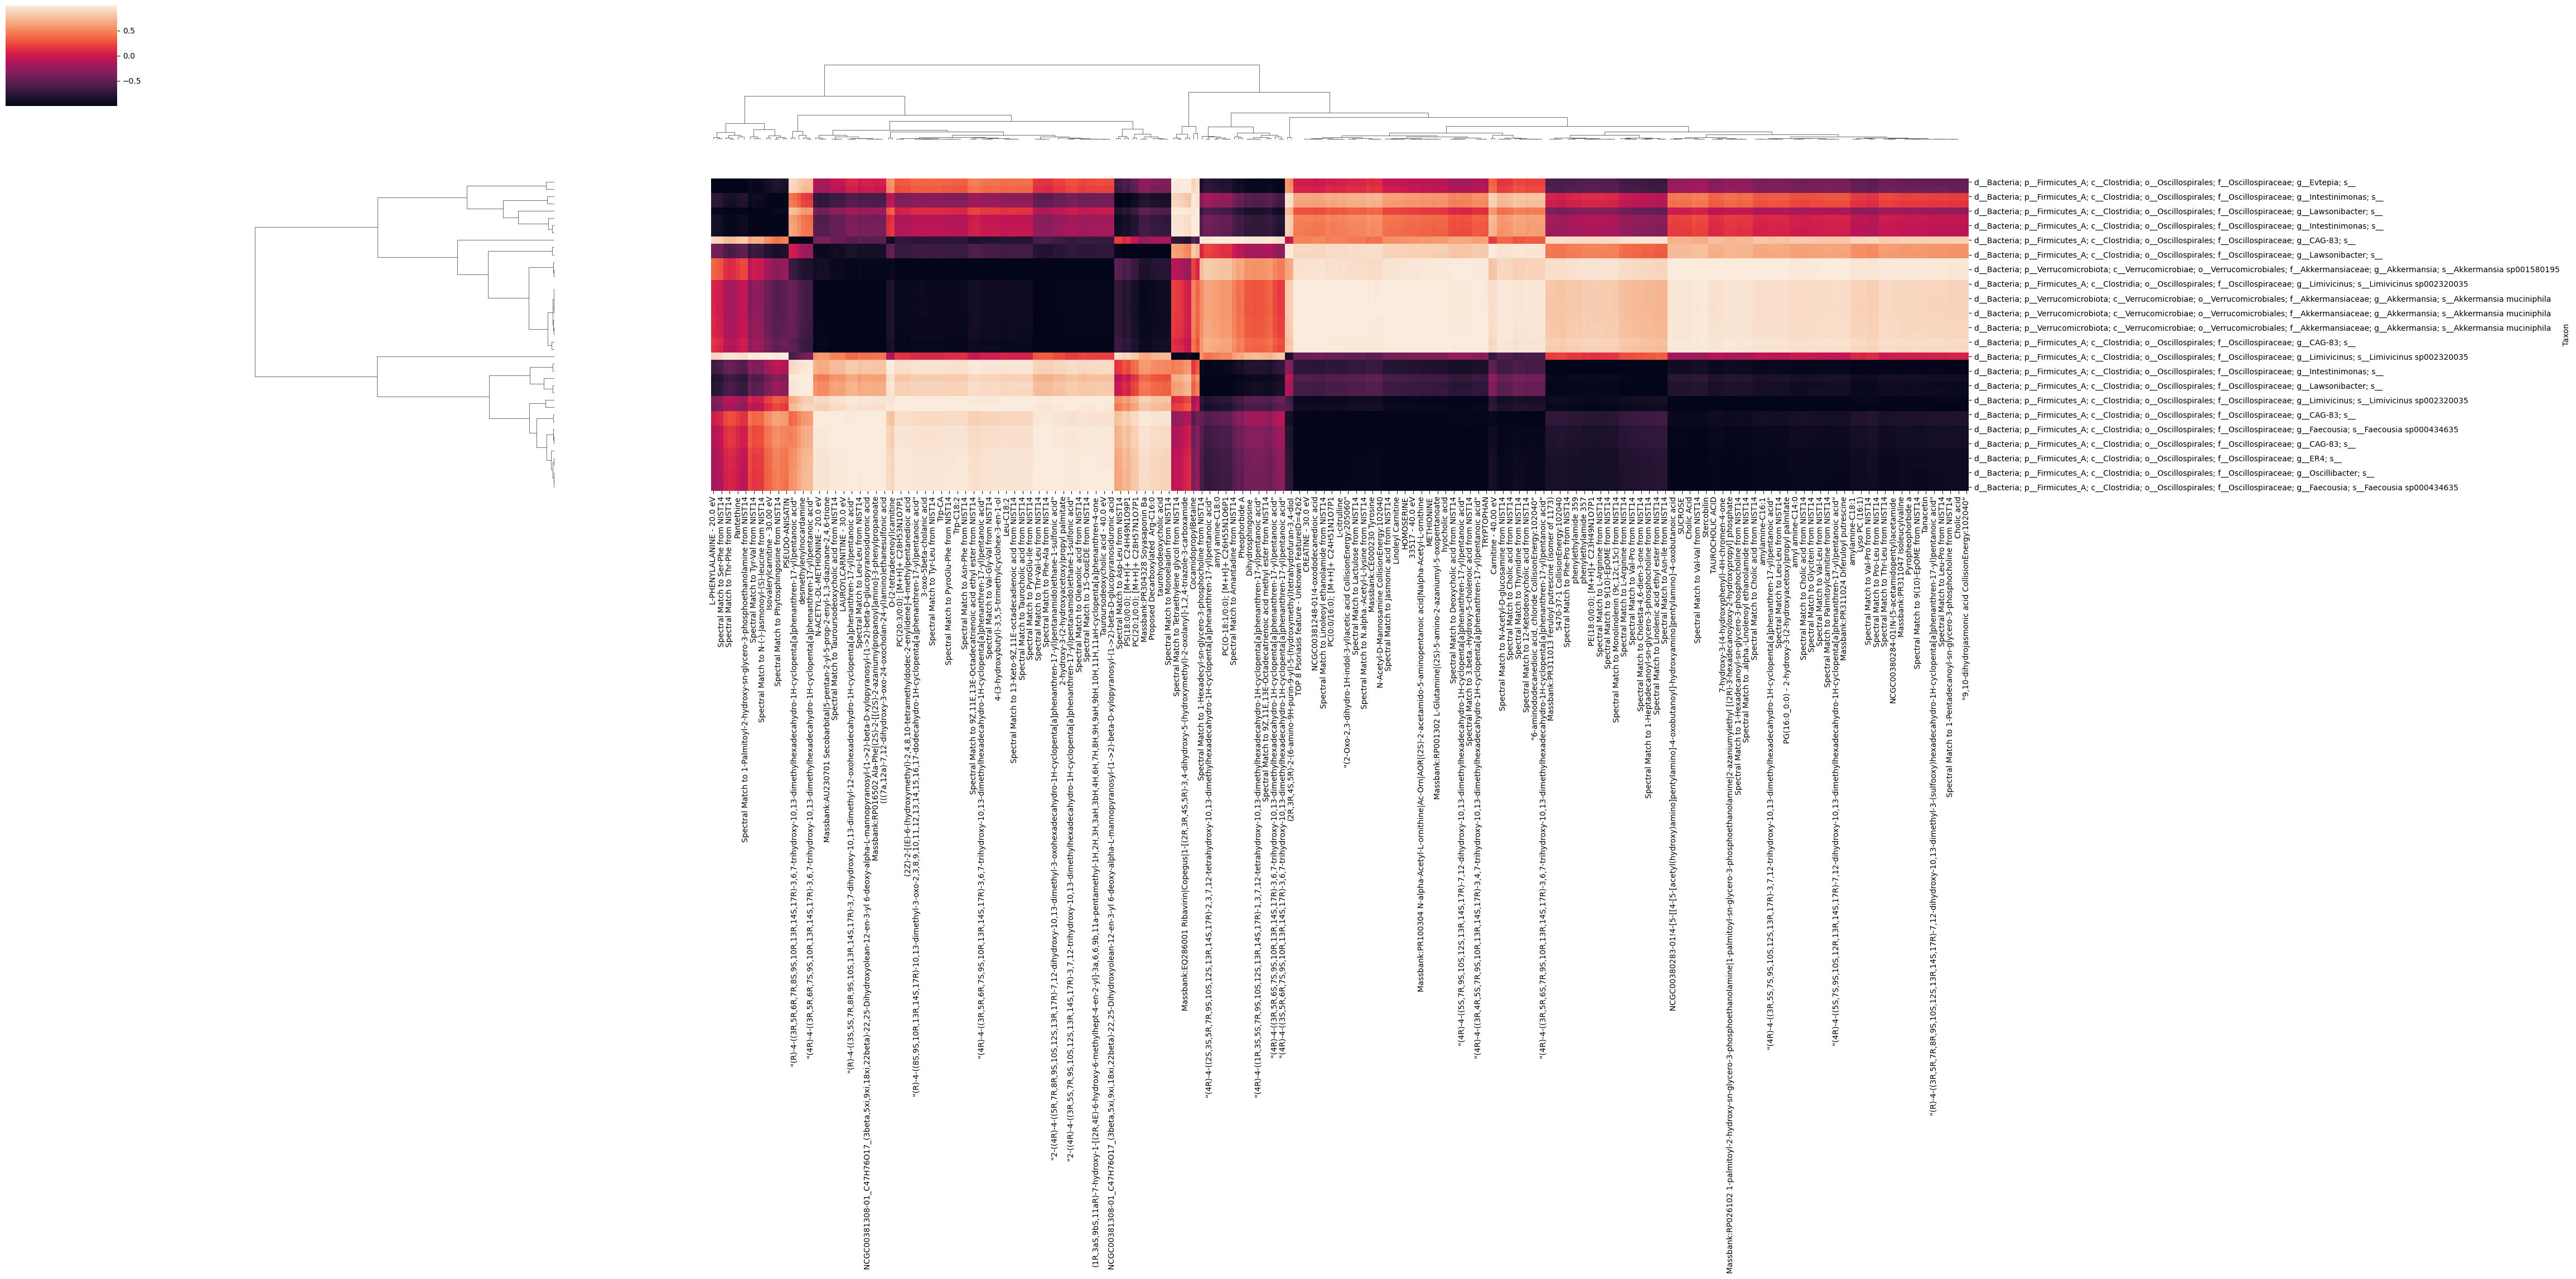

In [32]:
sns.clustermap(renamed4, figsize=(40, 10))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../data/Metabolome/sac_jointRPCA/VIPsex_micro-metab_corr_named.svg', 
            dpi=150, bbox_inches='tight')

/Users/callaband/miniforge3/envs/qiime2-2023.5-gemelli/lib/python3.8/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


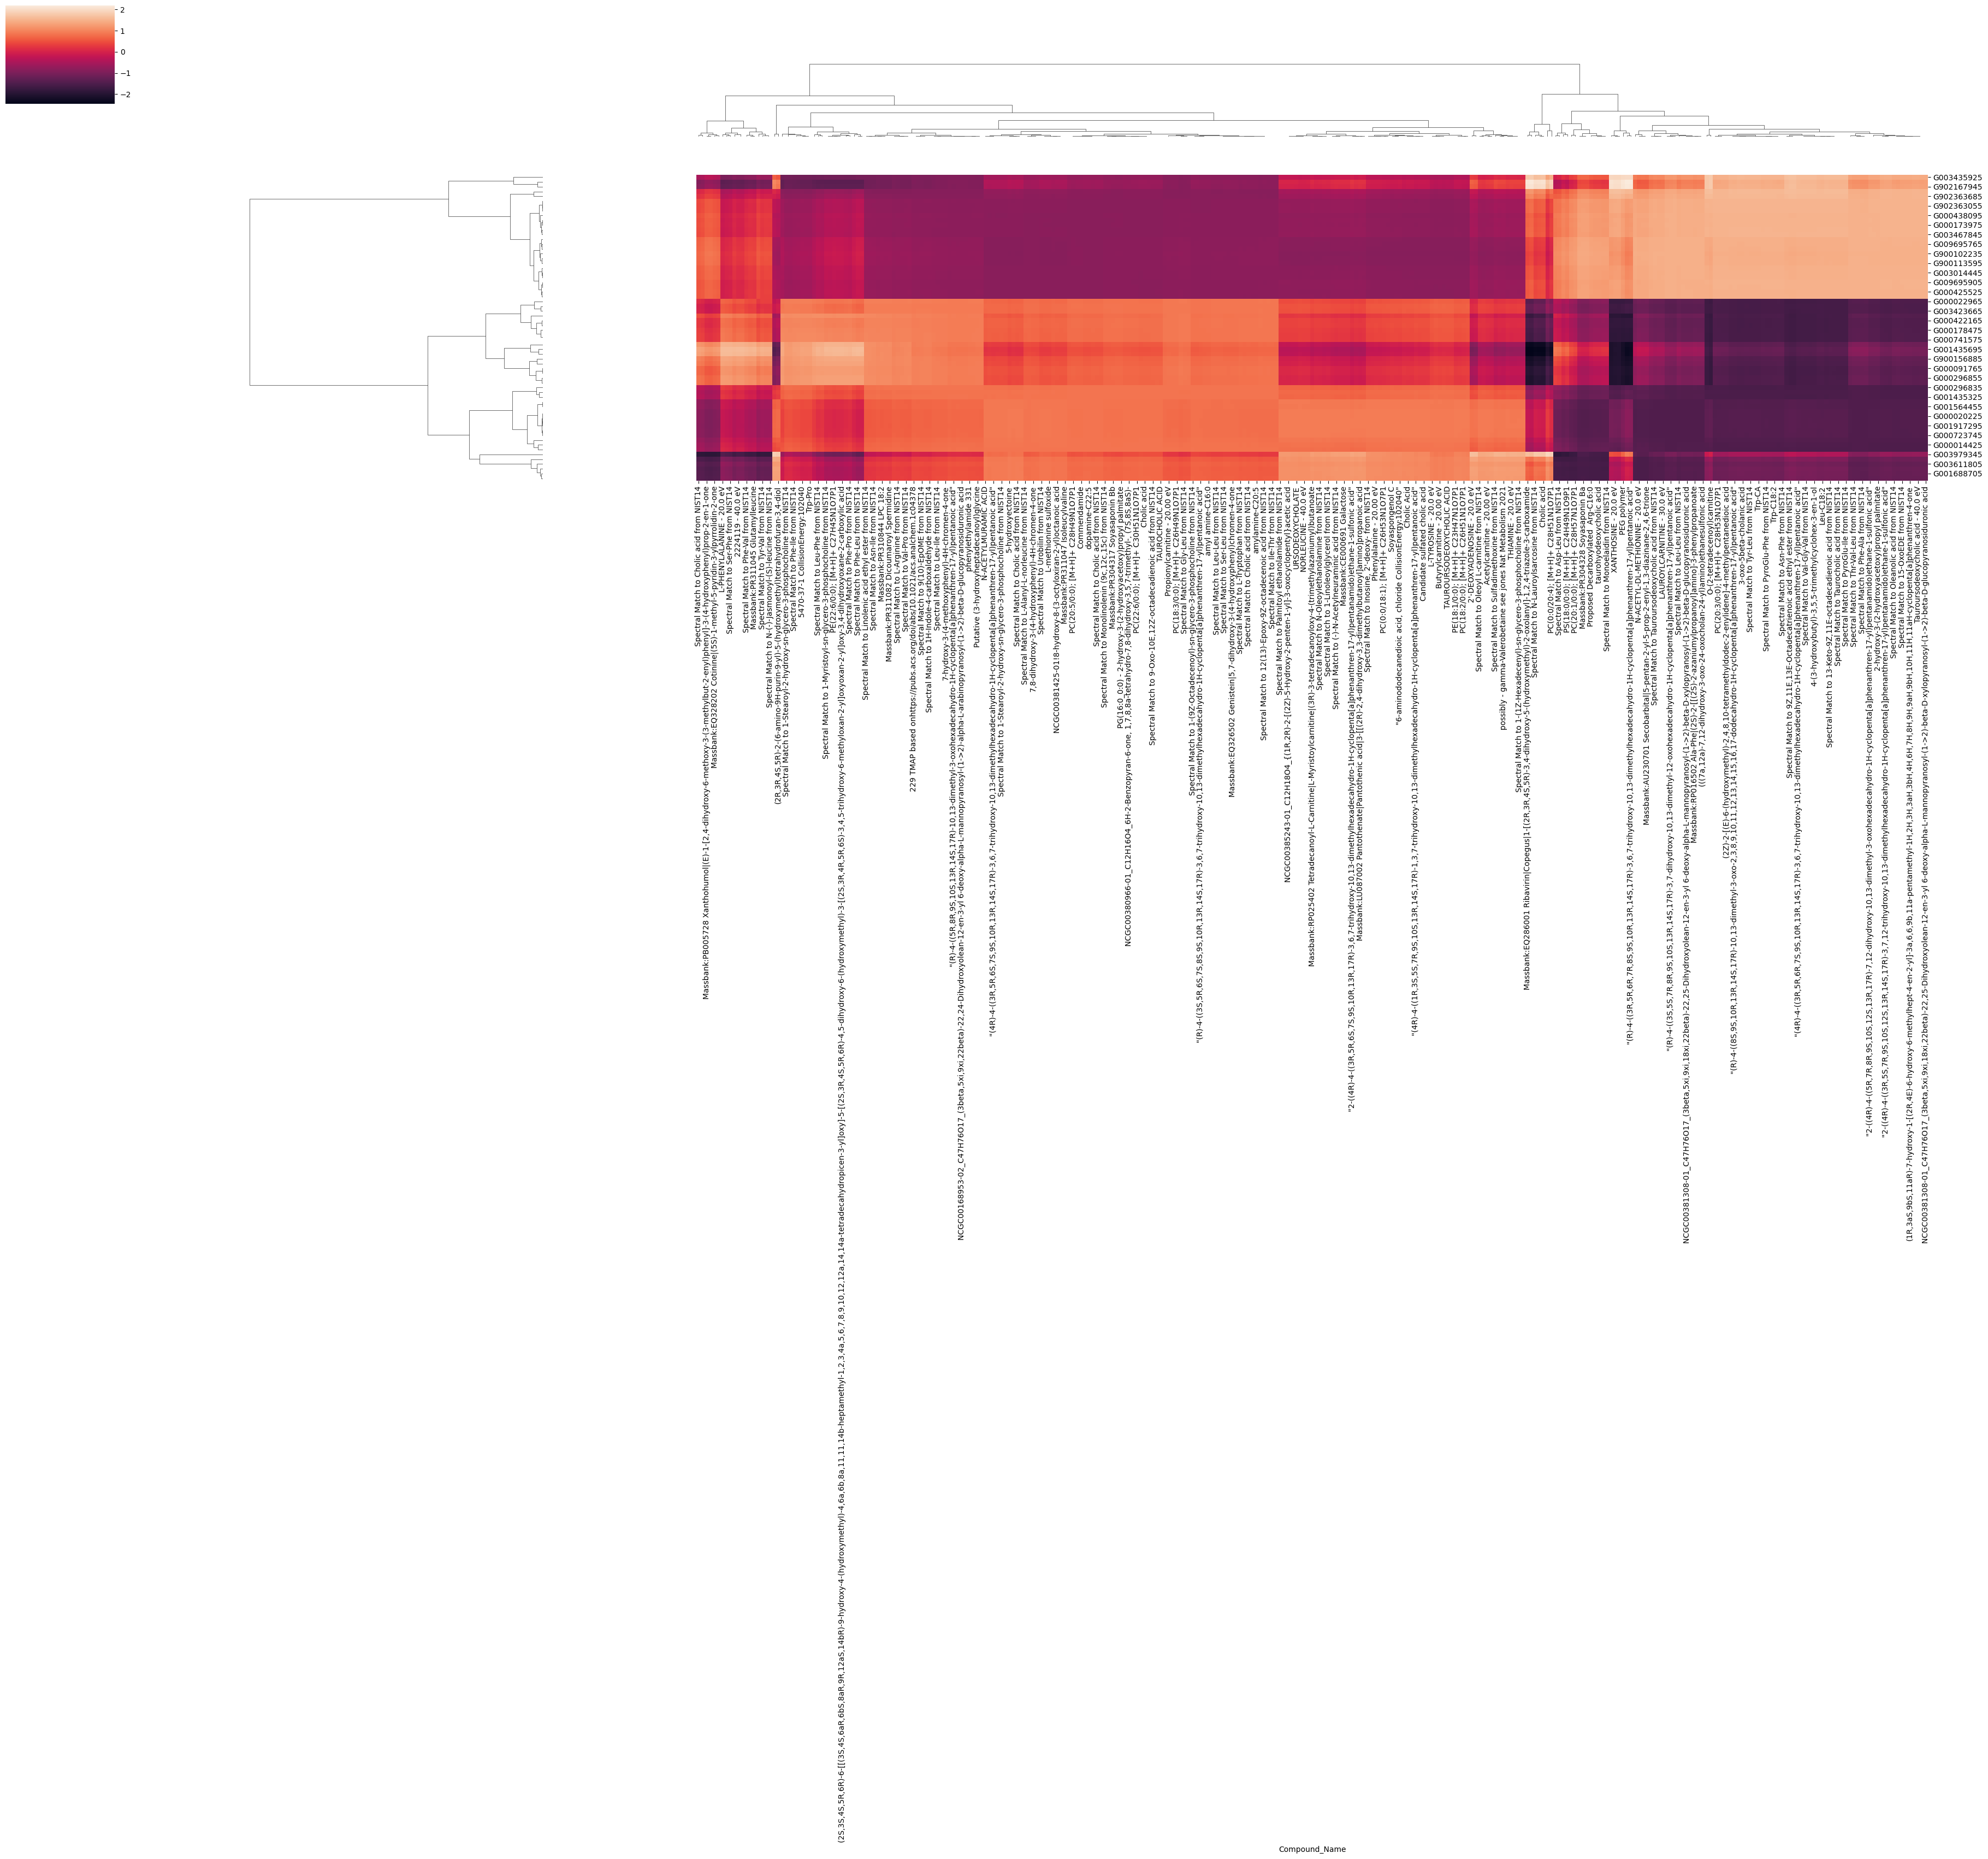

In [26]:
sns.clustermap(renamed2, z_score=0, figsize=(40, 10))
plt.show()